# <font color=red>Machine Learning</font>
## A practical ML tutorial for Data Science by Ehsan Mokhtari
### I used 'Python Data Science Handbook by Jake VanderPlas' as a reference for this tutorial

## <font color=red>What Is Machine Learning?</font>

### Fundamentally, machine learning involves building mathematical models to help understand data. “Learning” enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be “learning” from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.
### ML can be categorized into different types: supervised learning and unsupervised learning: <font color=green>Supervised, Unsupervised, Semi-supervised, Reinforcement.</font>

### <font color=green>Supervised learning</font> involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into <font color=green>classification</font> tasks and <font color=green>regression tasks</font>, in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.
### Some important classification algorithms are  <font color=green> Gaussian naive Bayes</font>, <font color=green>support vector machines</font> and <font color=green>random forest classification</font>.
### Some important regression algorithms are  <font color=green> linear regression</font>, <font color=green>support vector machines</font> and <font color=green>random forest regression</font>.

### <font color=green>Unsupervised learning</font> involves modeling the features of a dataset without reference to any label, and is often described as “letting the dataset speak for itself.” These models include tasks such as <font color=green>clustering</font> and <font color=green>dimensionality reduction</font>.  Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.the power of dimensionality reduction algorithms becomes clearer in higher-dimensional cases. For example, we might wish to visualize important relationships within a dataset that has 100 or 1,000 features. Visualizing 1,000-dimensional data is a challenge, and one way we can make this more manageable is to use a dimensionality reduction techni‐que to reduce the data to two or three dimensions.
### Some important clustering algorithms are  <font color=green> k-means clustering</font>, <font color=green>Gaussian mixture models</font> and <font color=green>spectral clustering</font>.
### Some important dimensionality reduction algorithms are <font color=green> principal component analysis </font>and <font color=green>various manifold learning algorithms</font> , including  <font color=green>Isomap</font> and <font color=green>locally linear embedding</font>.

## <font color=red> Introducing Scikit-Learn</font>
### scikit-learn is a free machine learning library for the python. It features various classification, regression and clustering, and is designed to interoperate with the python numerical and scientific libraries NumPy, SciPy and Pandas.
### <font color=green>Data Representation in scikit-learn</font>

### Machine learning is about creating models from data. The best way to think about data within Scikit-Learn is in terms of tables of data. A <font color=green>table</font> is a two-dimensional grid of data, in which the <font color=green>rows</font> represent individual elements of the dataset, and the <font color=green>columns</font> represent quantities related to each of these elements. Suppose its a <font color=green>[rows,columns] matrix</font>.
### We will refer to the rows of the matrix as <font color=green>samples</font>, and the number of rows as <font color=green>n_samples</font>.
### each column of the data refers to a particular quantitative piece of informa‐ tion that describes each sample. We will refer to the columns of the matrix as <font color=green>features</font>, and the number of columns as <font color=green>n_features</font>.

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(3)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

### We call the learning matrix (or X) as <font color=green>Features Matrix</font>.

In [2]:
# features matrix
X_iris = iris.drop('species', axis=1)

### We call the predictions (or Y) as <font color=green>Target Array</font>.

In [3]:
# target array
y_iris = iris['species']

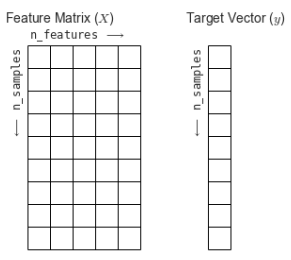

In [4]:
# As a model inputs :

''' X.shape >>> (233, )                   not ok

solutions:
    np.array(X).reshape(-1,1) >>> (233,1) ok
    X = X[:, np.newaxis] >>> (233,1)      ok
    also (233,2) and ...  is              ok  '''

''' Y.shape >>> (233,)                    ok
    also (233,2) and ...  is              ok  '''
print("This too shall pass")

This too shall pass


### <font color=green>Basics of the API</font>
### <font color=blue>1. Choose a class of model by importing the appropriate estimator class from ScikitLearn.</font>
### <font color=blue>2. Choose model hyperparameters by instantiating this class with desired values.</font>
### <font color=blue>3. Arrange data into a features matrix and target vector following the discussion from before.</font>
### <font color=blue>4. Fit the model to your data by calling the fit() method of the model instance.</font>
### <font color=blue>5. Apply the model to new data.</font>

## <font color=red>Model Validation and Hyperparameters</font>
### The choice of model and choice of hyperparameters are the most important part of using these tools and techniques effectively. we need a way to validate that our model and our hyperparameters are a good fit to the data (accuracy).

### <font color=green>Model validation : Holdout sets</font>
### We hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. We can do this splitting using the <font color=green>train_test_split</font> utility in Scikit-Learn

### Befor we start, lets explain about <font color=green> k-nearest neighbors classifier (kNN)</font>. KNN is a simple, <font color=green>supervised</font> machine learning (ML) algorithm that can be used for <font color=green>classification</font> or <font color=green>regression</font> tasks also frequently used in <font> color=green>missing value imputation </font>. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.
### <font color=green>K</font> is the number of nearest neighbors to use. For classification, a majority vote is used to determined which class a new observation should fall into. Larger values of K are often more robust to outliers and produce more stable decision boundaries than very small values (K=3 would be better than K=1, which might produce undesirable results.</br>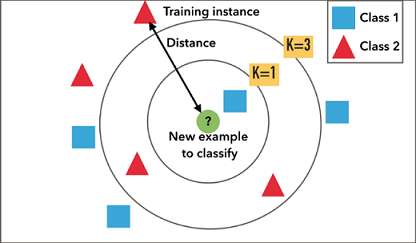

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.5)
'''params:
#  test_size, default=None >>> should be between 0.0 and 1.0
#  train_size, default=None >>> should be between 0.0 and 1.0
#  shuffle, default=True   >>> Whether or not to shuffle the data before splitting.
#  random_state, default=None >>> Controls the shuffling applied to the data before applying the split.
'''

model = KNeighborsClassifier(n_neighbors=1)
'''params:
#  n_neighbors, default=5 >>> Number of neighbors to use
#  weights{‘uniform’, ‘distance’},None, default=’uniform’ >>> Weight function used in prediction.
   ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
   ‘distance’ : weight points by the inverse of their distance.
#  algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’   
'''

model.fit(X_train, y_train)
'''
# model.fit(X, y) >>> Fit the k-nearest neighbors classifier from the training dataset.
# model.kneighbors([X, n_neighbors, return_distance]) >>> Find the K-neighbors of a point.
# model.predict(X) >>> Predict the class labels for the provided data.
# model.predict_proba(X) >>> Return probability estimates for the test data X.
# model.score(prediction, y_test) >>> Return the mean accuracy on the given test data and labels.
'''
prediction = model.predict(X_test)

print(accuracy_score(y_test, prediction))

0.9066666666666666


### <font color=green>Model validation : cross-validation</font>
### One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. One way to address this is to use cross-validation. that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.
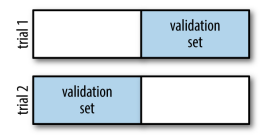

In [6]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.5)

prediction2 = model.fit(X1, y1).predict(X2)
prediction1 = model.fit(X2, y2).predict(X1)

print(accuracy_score(y1, prediction1)); print(accuracy_score(y2, prediction2))

0.96
0.9066666666666666


### We can mean the results to get a better measure of the global model performance which here is nearly 0.93
### This particular form of cross-validation is a <font color=green>two-fold cross-validation</font> in which we have split the data into two sets and used each in turn as a validation set.
### We could expand on this idea to use even more trials, and more folds in the data : 

In [7]:
from sklearn.model_selection import cross_val_score

# cv = number of folds
print(cross_val_score(model, X, y, cv=5))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


### <font color=green>Model validation : leave-one-out cross-validation</font>
### We might wish to go to the extreme case in which our number of folds is equal to the number of data points; that is, we train on all points but one in each trial. This type of cross-validation is known as leave-one-out cross-validation.

In [8]:
from sklearn.model_selection import LeaveOneOut
print(cross_val_score(model, X, y, cv=LeaveOneOut()).mean())

0.96


## <font color=green>Selecting the Best Model</font>
### Now that we’ve seen the basics of validation and cross-validation, we will go into a little more depth regarding model selection and selection of hyperparameters. So if our estimator is underperforming, how should we move forward? There are several possible answers:</br>• Use a more complicated/more flexible model</br>• Use a less complicated/less flexible model</br>• Gather more training samples</br>• Gather more data to add features to each sample
### The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

### <font color=green>The bias–variance trade-off</font>
### Fundamentally, the question of “the best model” is about finding a sweet spot in the trade-off between <font color=green>bias</font> and <font color=green>variance</font>.
### For example suppose these two regression fits to the same dataset: 

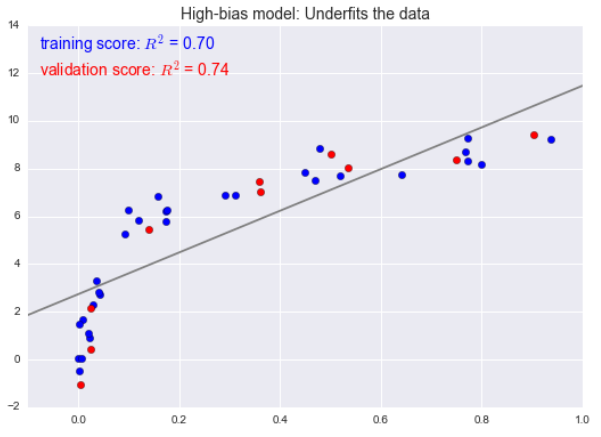

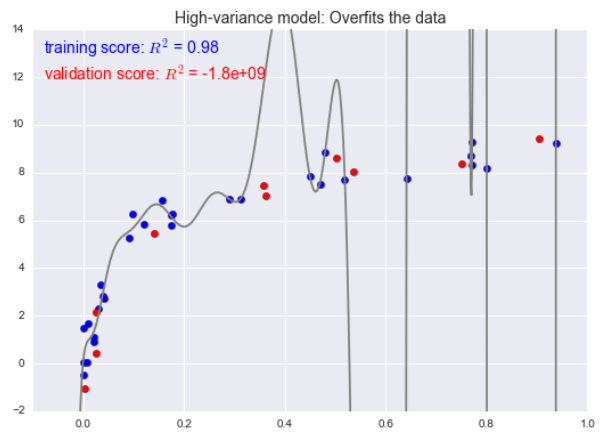

### First model: the data are intrinsically more complicated than a straight line, the straight-line model will never be able to describe this dataset well. Such a model is said to <font color=green>underfit</font> the data. Another way of saying this is that the model has <font color=green>high bias</font>.
### For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
### Second model : attempts to fit a high-order polynomial through the data. model is said to <font color=green>overfit</font> the data. Another way of saying this is that the model has <font color=green>high variance</font>.
### For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

### <font color=green>R^2</font> score, or <font color=green>coefficient of determination</font>, measures how well a model performs relative to a simple mean of the target values. <font color=green>R^2= 1</font> indicates a perfect match, <font color=green>R^2 = 0</font> indicates the model does no better than simply taking the mean of the data, and <font color=green>negative</font> values mean even worse models.

### The diagram below is <font color=green>validation curve</font> and it has some points :
### 1.The training score is everywhere higher than the validation score. This is gener‐ ally the case: the model will be a better fit to data it has seen than to data it has not seen.
### 2.For very low model complexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
### 3.For very high model complexity (a high-variance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.

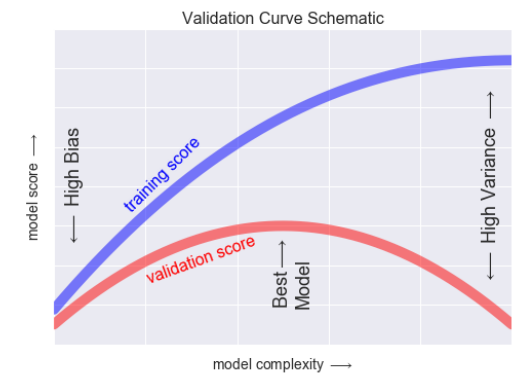

### A <font color=green>polynomial regression</font> is a generalized linear model in which the degree of the polynomial is a tunable parameter. For example, a <font color=green>degree-1</font> polynomial fits a straight line to the data; for model parameters a and b:
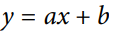

### A degree-3 polynomial fits a cubic curve to the data; for model parameters a,b,c,d: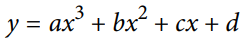

### So what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting) for this kind of cases?


### In Scikit-Learn, we can implement this with a simple linear regression combined with the polynomial pre-processor. We will use a pipeline to string these operations together :

In [9]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn; seaborn.set()

# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import train_test_split

# import numpy as np;import pandas as pd

# X = ... ; y = ... ; 
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.5)

# def PolynomialRegression(degree=2, **kwargs):
#    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

# degrees = np.arange(0, 21)

# for degree in [1,3,5]:
#    prediction = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)
#    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

# train_score, val_score = validation_curve(PolynomialRegression(),
#                           X, y, 'polynomialfeatures__degree',degree, cv=7)
# plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
# plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')

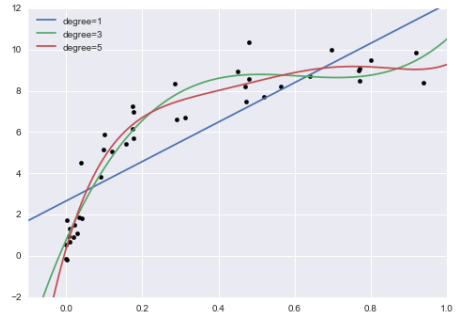

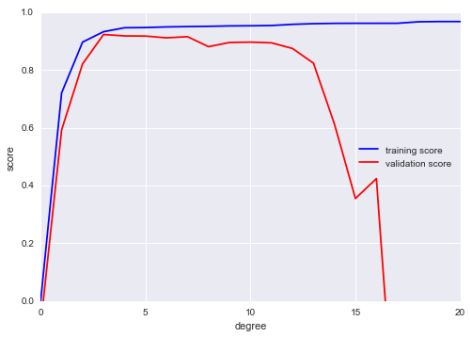

### From the validation curve, we can read off that the optimal trade-off between bias and variance is found for a third-order polynomial.

In [10]:
# model = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
# model.fit(X_train, y_train)

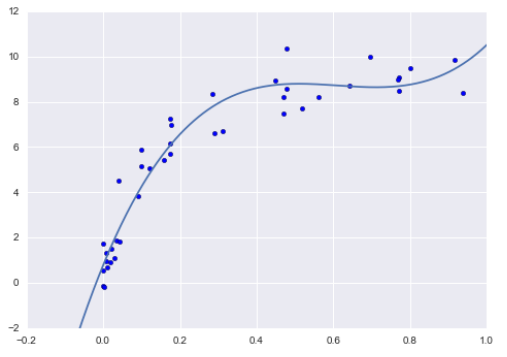

## <font color=red>Feature Engineering</font>
### Is taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix .

### <font color=green>Categorical Features</font>
### One common type of non-numerical data is categorical data. For example :

In [11]:
df = [ {'price': 850000, 'rooms': 4, 'neighborhood': 'Queens'},
       {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
       {'price': 650000, 'rooms': 3, 'neighborhood': 'Queens'},]

### In this case, one proven technique is to use <font color=green>one-hot encoding</font>, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. When your data comes as a list of dictionaries, Scikit-Learn’s DictVectorizer will do this for you:

In [12]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
'''params:
#  dtypedtype, default=np.float64 >>> The type of feature values.
#  separator:str default='=' >>> Separator string used when constructing new features for one-hot coding.
#  sparse, default=True  >>> Whether transform should produce scipy.sparse matrices.
#  sort, default=True  >>> Whether feature_names_ and vocabulary_ should be sorted when fitting.
'''

vec_fit = vec.fit_transform(df)
'''
# vec.fit(X[, y]) >>> Learn a list of feature name and indices mappings.
# vec.transform(X) >>> Transform feature->value dicts to array or sparse matrix.
# vec.fit_transform(X[, y]) >>> Learn a list of feature name and indices mappings and transform X.
# vec.get_feature_names_out([input_features]) >>> Get output feature names for transformation
# vec.inverse_transform(vec_fit) >>> Transform array or sparse matrix X back to feature mappings.
'''
vec_nms = vec.get_feature_names_out()
print(vec_nms);print(vec_fit)

['neighborhood=Fremont' 'neighborhood=Queens' 'price' 'rooms']
[[     0      1 850000      4]
 [     1      0 700000      3]
 [     0      1 650000      3]]


### There is one disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [13]:
vec = DictVectorizer(sparse=True, dtype=int)
vec_fit = vec.fit_transform(df)
print(vec_fit,"\n**********")

import pandas as pd
print(pd.DataFrame(vec_fit.toarray(), columns=vec.get_feature_names_out()))

  (0, 1)	1
  (0, 2)	850000
  (0, 3)	4
  (1, 0)	1
  (1, 2)	700000
  (1, 3)	3
  (2, 1)	1
  (2, 2)	650000
  (2, 3)	3 
**********
   neighborhood=Fremont  neighborhood=Queens   price  rooms
0                     0                    1  850000      4
1                     1                    0  700000      3
2                     0                    1  650000      3


### <font color=green>Text Features</font>
### Another common need in feature engineering is to convert text to a set of representative numerical values. One of the simplest methods of encoding data is by <font color=green>word counts</font>: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

df = ['problem of evil','evil queen','horizon problem']

vec = CountVectorizer()
vec_fit = vec.fit_transform(df)
'''
# vec.fit(raw_documents[, y]) >>> Learn a vocabulary dictionary of all tokens in the raw documents.
# vec.transform(raw_documents) >>> Transform documents to document-term matrix. 
# vec.fit_transform(raw_documents[, y]) >>> Learn the vocabulary dictionary and return document-term matrix.
# vec.get_feature_names_out([input_features]) >>> Get output feature names for transformation
# vec.inverse_transform(vec_fit) >>> Return terms per document with nonzero entries in X.
'''

print(vec_fit,"\n********")
print(pd.DataFrame(vec_fit.toarray(), columns=vec.get_feature_names_out()))

  (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1 
********
   evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0


### There are some issues with this approach, however: the raw word counts lead to features that put too much weight on words that appear very frequently, and this can be suboptimal in some classification algorithms. One approach to fix this is known as <font color=green>term frequency–inverse document frequency (TF–IDF)</font>, which weights the word counts by a measure of how often they appear in the documents.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec_fit = vec.fit_transform(df)
'''same as CountVectorizer'''

print(pd.DataFrame(vec_fit.toarray(), columns=vec.get_feature_names_out()))

       evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000


### <font color=green>Image Features</font>
### The simplest approach is using the pixel values themselves. But depending on the application, such approaches may not be optimal. But these are some common ways as extracting features from images :
### Method 1: Grayscale Pixel Values as Features
### Method 2: Mean Pixel Value of Channels as Features
### Method 3: Extracting Edge Features. There are various kernels that can be used to highlight the edges in an image such as Prewitt kernel. 

### <font color=green>Derived Features</font>


In [16]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
X = X[:, np.newaxis]

y = np.array([4, 2, 1, 3, 7])

### We can fit a line to the data using LinearRegression and get the optimal result, But It’s clear that we need a more sophisticated model to describe the relationship between x and y. We can do this by transforming the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
'''params :
# degree : int or tuple (min_degree, max_degree), default=2
# include_biasbool, default=True >>> to if include a bias column or not,
                     the feature in which all polynomial powers are zero 
'''
X_transformed = poly.fit_transform(X)
'''
# poly.fit(X[, y])  >>> Compute number of output features.
# poly.transform(X)  >>> Transform data to polynomial features.
# poly.fit_transform(X[, y]) >>> Fit to data, then transform it.
'''

print(X_transformed)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


### The derived feature matrix has one column representing x, and a second column representing x^2, and a third column representing x^3. Computing a linear regression on this expanded input gives a much closer fit to our data.

In [18]:
# model = LinearRegression().fit(X_transformed, y)

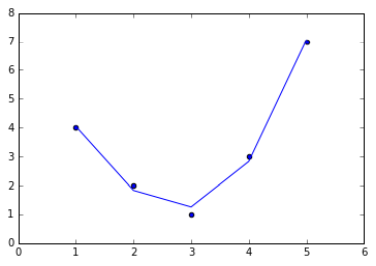

### <font color=green>Imputation of Missing Data</font>
### Another common need in feature engineering is handling missing data.

In [19]:
import numpy as np
from numpy import nan

X = np.array([[ nan, 0, 3 ],[ 3, 7, 9 ],[ 3, 5, 2 ],[ 4, nan, 6 ],[ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

### When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value. This is known as <font color=green>imputation of missing values</font>, and strategies range from <font color=green>simple</font> (e.g replacing missing values with the mean of the column, median, or most frequent value) to <font color=green>sophisticated</font> (e.g using matrix completion or a robust model to handle such data).


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
'''params:
#  missing_values {int, float, str, np.nan, None or pandas.NA} default=np.nan
#  strategy{“mean”, “median”, “most_frequent”, “constant”} default=’mean’
#  fill_value, default=None >>> When strategy == “constant”, fill_value is used to replace.
'''
X2 = imputer.fit_transform(X)
'''
# imputer.fit(X[, y])  >>> Fit the imputer on X.
# imputer.transform(X) >>> Impute all missing values in X
# imputer.fit_transform(X[, y]) >>> Fit to data, then transform it.
# imputer.inverse_transform(X2) >>> Convert the data back to the original representation.
'''

print(X2)

[[4.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  5.  6. ]
 [8.  8.  1. ]]


### <font color=green>Feature Pipelines</font>
### A machine learning <font color=green>pipeline</font> is the end-to-end construct that orchestrates the flow of data into, and output from, a machine learning model (or set of multiple models). It includes raw data input, features, outputs, the machine learning model and model parameters, and prediction outputs.
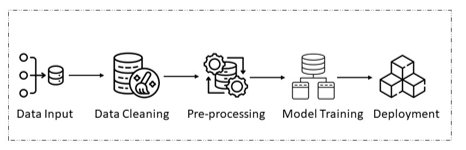

### For example, we might want a pipeline that: </br>1. Impute missing values using the mean</br>2. Transform features to quadratic</br>3. Fit a linear regression

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

 
model = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
'''params:
#  steps:list of tuple
#  verbose, default=False >>> If True, the time elapsed while fitting each step will be printed.
'''
model.fit(X, y)
'''
# model.fit(X[, y]) >>> Fit the model.
# model.transform(X) >>> Transform the data, and apply transform with the final estimator.
# model.fit_transform(X[, y]) >>> Fit the model and transform with the final estimator.
# model.inverse_transform(Xt) >>> Apply inverse_transform for each step in a reverse order.
# model.predict(X, **predict_params) >>> Transform the data, and apply predict with the final estimator.
# model.fit_predict(X[, y]) >>> Transform the data, and apply fit_predict with the final estimator.
# model.predict_proba(X, **predict_proba_params) >>> Transform the data, and apply predict_proba with the final estimator.
# model.score(X[, y, sample_weight]) >>> Transform the data, and apply score with the final estimator.
'''
#model.predict(X_test)
print("yey")

yey


## <font color=red>In Depth: Naive Bayes Classification</font>
### Naive Bayes models are a group of extremely fast and simple <font color=green>classification</font> algorithms that are often suitable for very high-dimensional datasets. Because they are so <font color=green>fast</font> and have so <font color=green>few tunable parameters</font>, they end up being very useful as a quick-and dirty baseline for a classification problem.

### Naive Bayes classifiers are built on <font color=green>Bayesian classification methods</font>. These rely on <font color=green>Bayes’s theorem</font>, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we’re interested in finding the probability of a label given some observed features, which we can write as </br><font color=green>P(L | features)</font> 
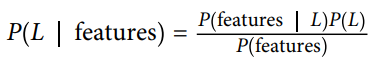
### If we are trying to decide between two labels L1 and L2, then one way to make this decision is to compute the ratio of the posterior probabilities for each label: 
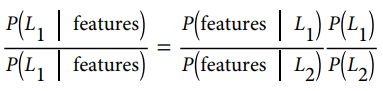

### All we need now is some model by which we can compute P features Li for each label. Such a model is called a <font color=green>generative model</font>. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. For example when input is a circle, in output lables the p of circle is .99, the p of triangle is .2 and ... and the category with the highest probability will be output.
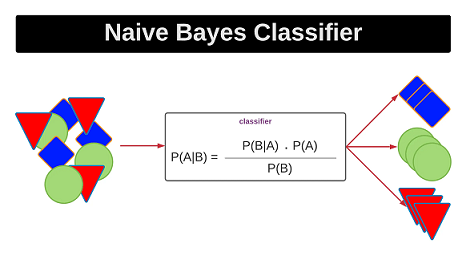
### There are different types of naive Bayes classifiers rest on different naive assumptions about the data.

### <font color=green>Gaussian Naive Bayes</font>
### The easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple <font color=green>Gaussian distribution</font> ( <font color=green>Normal distributions</font>, also known as <font color=green>bell-shaped curves</font>).
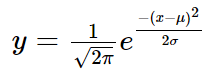
### It's the Gaussian distribution formula Where μ = Mean, σ = Standard Deviation, π≈3.14159, e≈2.71828
### We assume that the data is described by a Gaussian distribution with no covariance between dimensions. We can fit this model by simply finding the mean and standard deviation of the points within each label.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

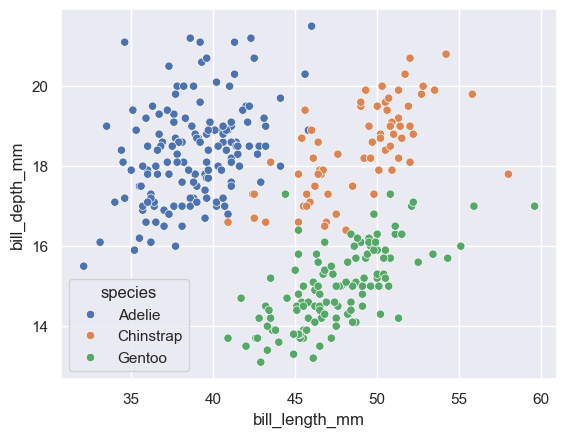

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = sns.load_dataset('penguins')
df = df.dropna()

sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')

In [23]:
from sklearn.naive_bayes import GaussianNB

X = df[['bill_length_mm','bill_depth_mm']]; y=df['species']; print(X.shape , y.shape)

model = GaussianNB()
model.fit(X.values, y.values)
'''
# model.fit(X, y[, sample_weight]) >>> Fit Gaussian Naive Bayes according to X, y.
# model.predict(X) >>> Perform classification on an array of test vectors X.
# model.predict_proba(X) >>> Return probability estimates for the test vector X.
# model.score(X, y[, sample_weight]) >>> Return the mean accuracy on the given test data and labels.
# model.class_count_ >>> number of training samples observed in each class.
# model.classes_ >>> class labels known to the classifier.
# model.theta_ >>> mean of each feature per class.
'''

x_test = np.array([[50,19]]); print(x_test.shape)

prediction = model.predict(x_test)  #this generates only the prediction for input
print(prediction)

prediction_probability = model.predict_proba(x_test) #this generates the probability for each lable for given input
print(prediction_probability)

(333, 2) (333,)
(1, 2)
['Chinstrap']
[[3.67166789e-04 9.99162333e-01 4.70500670e-04]]


### <font color=green>Multinomial Naive Bayes</font>
### In this kind of Naive Bayes, the features are assumed to be generated from a simple <font color=green>multinomial distribution</font> . The multinomial distribution describes the <font color=green>probability of observing counts among a number of categories</font> , and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates. The multinomial distribution is a generalization of the <font color=green>binomial distribution</font> and is used to find the probabilities in experiments with more than two outcomes.
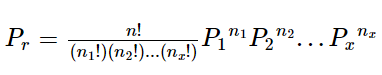
### The probability that player A will win any game is 20%, the probability that player B will win is 30%, and the probability player C will win is 50%. If they play 6 games, what is the probability that player A will win 1 game, player B will win 2 games, and player C will win 3?
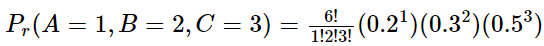

### The <font color=green>binomial distribution</font> is a discrete probability distribution that applies to binomial experiments (experiments with binary outcomes). It’s the number of successes in a specific number of trials. For example the number of heads that appear in 10 times of flipping a coin.

### One place where multinomial naive Bayes is often used is in <font color=green>text classification</font> and <font color=green>NLP</font>, where the features are related to word counts or frequencies within the documents to be classified.

### The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribution with a best-fit multinomial distribution.

In [24]:
from sklearn.datasets import fetch_20newsgroups

# data archive from the original 20 newsgroups website
print(list(fetch_20newsgroups().target_names))

df = fetch_20newsgroups(categories=['sci.crypt','sci.electronics','talk.politics.guns','sci.space'])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [25]:
print(df.filenames.shape)
print(df.target.shape)
print(df.target_names)
print(df.data[4])
print(df.target[4])
print(df.target_names[df.target[4]])

(2325,)
(2325,)
['sci.crypt', 'sci.electronics', 'sci.space', 'talk.politics.guns']
From: <34AEJ7D@CMUVM.BITNET>
Subject: Re: Who's next? Mormons and Jews?
Distribution: world
Lines: 4

As a minor point of interest, earlier news reports claim to have
been quoting the Governor of Texas when Her Holiness referred to
the Dividians as _Mormons_ and called for their expulsion
from TX. Any Texans have details?

3
talk.politics.guns


### In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF–IDF vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors_fit = vectorizer.fit(df.data)
vectors_transformed = vectorizer.transform(df.data)

print(vectors_transformed.shape)
print(pd.DataFrame(vectors_transformed.toarray(), columns=vectorizer.get_feature_names_out()).iloc[0])

(2325, 39418)
00          0.0
000         0.0
0000        0.0
00000       0.0
000000      0.0
           ... 
égligent    0.0
élangea     0.0
érale       0.0
ête         0.0
ýé          0.0
Name: 0, Length: 39418, dtype: float64


### so the vectors contains 2325 rows each row with 39418 columns and each columns indicates the tf-idf value of the word for that index text, for example in the results below, the tf-idf value for word 'egligent' in the index[0] text is 0.
### now we build our MultinomialNB model :

In [27]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
'''same as GaussianNB'''
model.fit(vectors_transformed, df.target)

MultinomialNB()

In [28]:
x_test = ["bitcoin will pump and etherium will dump"]

prediction = model.predict(vectorizer.transform(x_test))
print(prediction)
print(df.target_names[prediction[0]])

[0]
sci.crypt


### But we can simply automate all the steps above and create a pipeline that attaches TfidfVectorize to a multinomial naive Bayes classifier.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(df.data, df.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [30]:
x_test = ["bitcoin will pump and etherium will dump"]

prediction = model.predict(x_test)
print(prediction)
print(df.target_names[prediction[0]])

[0]
sci.crypt


## <font color=red>In Depth: Linear Regression</font>
### Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable.

### <font color=green> Simple Linear Regression</font>
### A <font color=green>straight-line fit</font> is a model of the form <font color=green>y = ax + b</font> where a is commonly known as the <font color=green>slope</font>, and b is commonly known as the <font color=green>intercept</font>.


<Axes: xlabel='total_bill', ylabel='tip'>

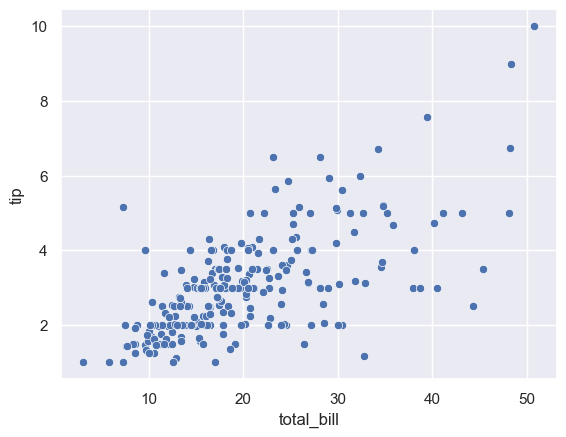

In [31]:
df = sns.load_dataset("tips")

#it accepts differnt kind of input formats but this way is better
sns.scatterplot(data=df, x='total_bill', y='tip')

In [32]:
X = df['total_bill']; Y = df['tip']

print(X.shape) #which is incorrect shape as a model X input
print(Y.shape) #is a correct shape as a model Y input

X = np.array(X).reshape(-1,1)
print(X.shape)#now it is a correct shape for as a model X input

(244,)
(244,)
(244, 1)


In [33]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=True)
'''params:
#  fit_intercept, default=True >>> Whether to calculate the intercept for this model.
                                      If set to False, no intercept will be used in calculations 
#  positive, default=False >>> When set to True, forces the coefficients to be positive. 
'''

'''
# model.fit(X, y[, sample_weight]) >>> Fit linear model.
# model.predict(X) >>> Predict using the linear model.
# model.score(X, y[, sample_weight]) >>> Return the coefficient of determination of the prediction.
# model.coef_ >>> Estimated coefficients for the linear regression problem. 
# model.intercept_ >>> Independent term in the linear model.
'''
model.fit(X, Y)

LinearRegression()

In [34]:
print("a or slope: ", model.coef_[0])
print("b or intercept:", model.intercept_)

a or slope:  0.10502451738435337
b or intercept: 0.9202696135546731


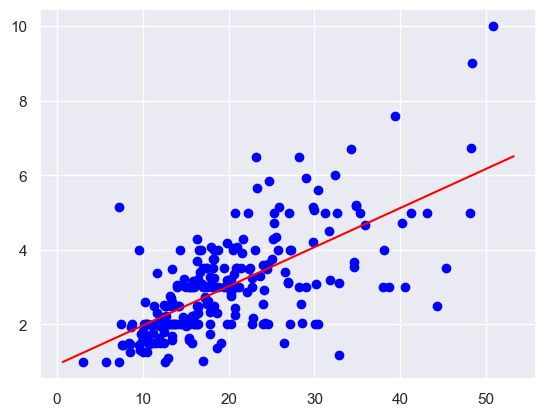

In [35]:
#in seaborn, ploting two plot in one ax is hard, so we use matplotlib insted in this case
fig = plt.figure(); ax = plt.axes()

ax.scatter(df['total_bill'], df['tip'], marker='o', color='blue', alpha=1)
x_vals = np.array(ax.get_xlim()); y_vals = model.coef_[0] * x_vals + model.intercept_ 
ax.plot(x_vals, y_vals, color="red")

### or simply we can draw regession with regplot or lmplot

<Axes: ylabel='tip'>

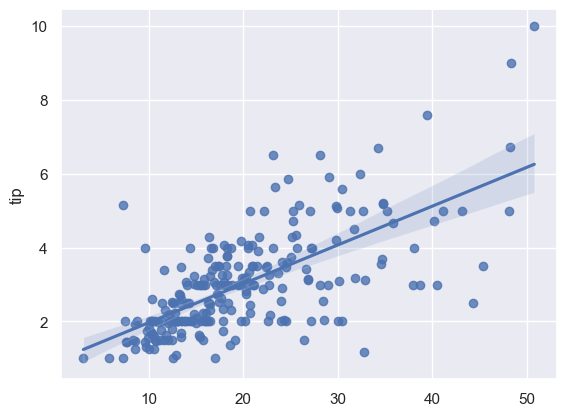

In [36]:
#regplot accepts differen types of input formats
sns.regplot(x=X, y=Y, order = 1) #order = 1 >>> ax+b

#but lmplot only accepts this format
#sns.lmplot(data = df, x = "total_bill", y = "tip")

### The LinearRegression estimator is much more capable than this, however in addition to simple straight-line fits, it can also handle <font color=green>multidimensional linear</font> models of the form this equation in which the xi is the i th  inputs.
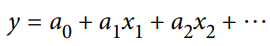

### <font color=green>Basis Function Regression</font>
### One trick you can use to adapt linear regression to <font color=green>nonlinear relationships</font> between variables is to transform the data according to basis functions.We simply transform the input into a high dimensional space where the regression/classification is again linear! We have seen one version of this in the PolynomialRegression pipeline :) The idea is to take our multidimensional linear model
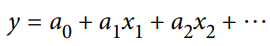
### and build the x1, x2, x3, ...  from our single-dimensional input x. we get the xi from xn = fn(x), and we call fn() the <font color=green>transform function</font>.  For example, if 
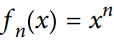
### our model becomes a polynomial regression:
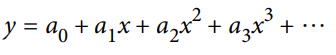

### Notice that this is still a linear mode. What we have effectively done is taken our one-dimensional x values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between x and y.

### <font color=green>Polynomial basis functions</font>


In [37]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
'''params :
# degree : int or tuple (min_degree, max_degree), default=2
# include_bias, default=True >>> to if include a bias column or not,
                    the feature in which all polynomial powers are zero '''

poly.fit_transform(X[:, np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

### We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. With this transform in place, we can use the linear model to fit much more complicated relationships between xand y. for example suppose this data :

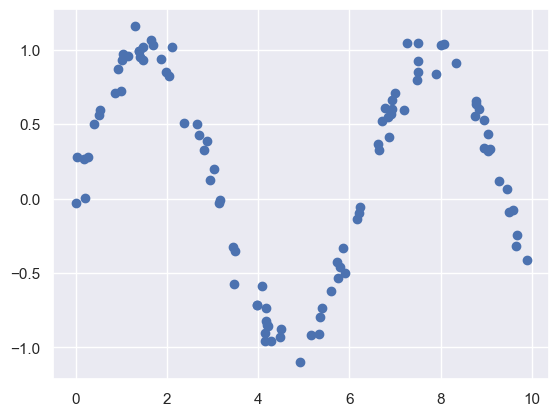

In [38]:
fig = plt.figure(); ax = plt.axes()

rnd = np.random.RandomState(1); X = 10 * rnd.rand(100); y = np.sin(X) + 0.1 * rnd.randn(100)
ax.scatter(X, y)

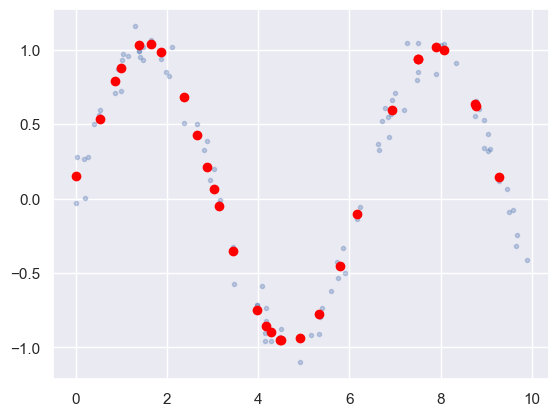

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
fig = plt.figure(); ax = plt.axes()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.7)

model = make_pipeline(PolynomialFeatures(degree=7),LinearRegression())
model.fit(X_train[:, np.newaxis], y_train)

ax.scatter(X, y,alpha=.3,marker='.')
prediction = model.predict(X_test[:, np.newaxis])
''' The plot doesn't work well on ax.plot because the data is not sorted and each data with the next data
is not close and the result is some chaotic plots, so insted for showing the regression line, i use scatter and 
it works pretty well!''' 
ax.scatter(X_test, prediction, color="red",marker='o')

### <font color=green>Regularization</font>
### One of the major aspects of training your machine learning model is <font color=green>avoiding overfitting</font>. The model will have a <font color=green>low accuracy if it is overfitting</font>. This happens because your model is trying too hard to capture the <font color=green>noise</font> in your training dataset. By noise we mean the data points that don’t really represent the true properties of your data, but random chance. Learning such data points, makes your model at the risk of overfitting.
### <font color=green>Regularization</font>, This is a form of regression, that regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.Regularization is a technique in machine learning that tries to achieve the generalization of the model. It means that our model works well not only with training or test data, but also with the data it’ll receive in the future. In summary, to achieve this, regularization shrinks the weights toward zero to discourage complex models. Accordingly, this avoids overfitting and reduces the variance of the model.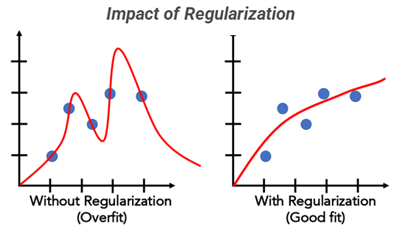

### A simple relation for linear regression looks like this. Here Y represents the learned relation and β represents the coefficient estimates for different variables or predictors(X).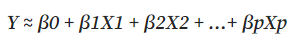

### The fitting procedure involves a <font color=green>loss function</font>, known as  <font color=green>residual sum of squares</font> or <font color=green>RSS</font>. The coefficients are chosen, such that they minimize this loss function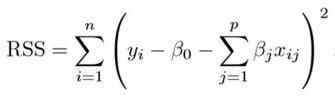
### Now, this will adjust the coefficients based on your training data. If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.
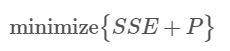

### <font color=green>Ridge regression (L2 regularization)</font>
### Perhaps the most common form of regularization, also called <font color=green>Tikhonov regularization</font>.Basically here, we’re going to minimize the sum of squared errors and sum of the squared coefficients (β). In the background, the coefficients (β) with a large magnitude will generate the graph peak and deep slope, to suppress this we’re using the lambda (λ) use to be called a Penalty Factor and help us to get a smooth surface instead of an irregular-graph. Ridge Regression is used to push the coefficients(β) value nearing zero in terms of magnitude. 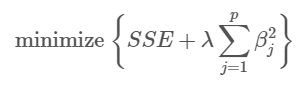

In [40]:
# from sklearn.linear_model import Ridge

# model = make_pipeline(PolynomialFeatures(degree=7),LinearRegression(), Ridge(alpha=0.1))
# model.fit(X,y)

### <font color=green>Lasso Regression (L1 Regularization)</font>
### This is very similar to Ridge Regression, with little difference in Penalty Factor that coefficient is magnitude instead of squared. In which there are possibilities of many coefficients becoming zero, so that corresponding attribute/features become zero and dropped from the list, this ultimately reduces the dimensions and supports for dimensionality reduction. 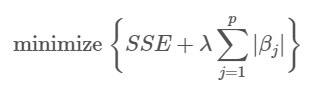

In [41]:
# from sklearn.linear_model import Lasso

# model = make_pipeline(PolynomialFeatures(degree=7),LinearRegression(), Lasso(alpha=0.001))
# model.fit(X,y)

## <font color=red>In-Depth: Support Vector Machines</font>
### Support vector machines (SVMs) are a particularly powerful and flexible class of <font color=green>supervised</font> algorithms for both <font color=green>classification</font> and <font color=green>regression</font> .

### Here we will consider <font color=green>discriminative classification</font>: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that <font color=green>divides the classes from each other</font> .</br>For example suppose the data below :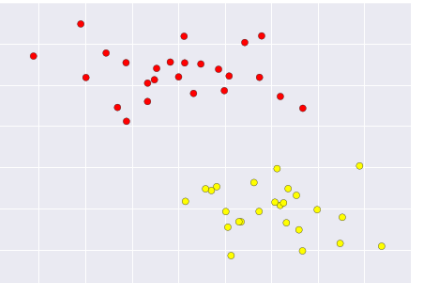
### A <font color=green>linear discriminative classifier</font> would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes! Depending on which you choose, a new data point “x” will be assigned a different label!

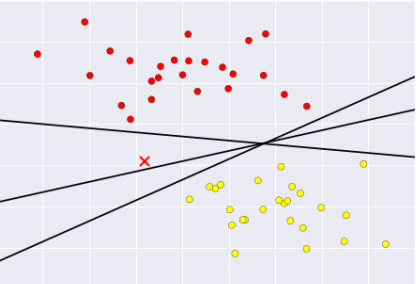

### Support vector machines offer one way to improve on this. rather than simply drawing a zero-width line between the classes, we can draw around each line a <font color=green>margin</font> of some width, up to the nearest point. In support vector machines, <font color=green>the line that maximizes this margin is the one we will choose as the optimal model</font> (in this example the second line is the optimal model). Support vector machines are an example of such a <font color=green>maximum margin estimator</font> .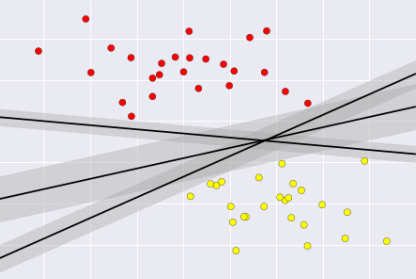

### Let’s see the result of an actual fit to this data, we will use a linear kernel :

In [42]:
# from sklearn.svm import SVC

# model = SVC(kernel='linear')
''' params :
#   C, default=1.0 >>> Regularization parameter. The strength of the regularization
#   kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#   degree, default=3 >>> Degree of the polynomial kernel function
'''
# model.fit(X, y)
'''
# model.fit(X, y[, sample_weight]) >>> Fit the SVM model according to the given training data.
# model.predict(X) >>> Perform classification on samples in X.
# model.predict_proba(X) >>> Compute probabilities of possible outcomes for samples in X.
# model.decision_function(X) >>> Evaluate the decision function for the samples in X.
# model.support_ >>>Indices of support vectors.
# model.support_vectors_ >>> Support vectors
# model.n_support_ >>> Number of support vectors for each class.
'''
print("yey")

yey


### Notice that a few of the training points just touch the margin; they are indicated by the black circles. These points are the pivotal elements of this fit, and are known as the <font color=green>support vectors</font>. A key to this classifier’s success is that for the fit, <font color=green>only the position of the support vectors matters</font>; any points further from the margin that are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.
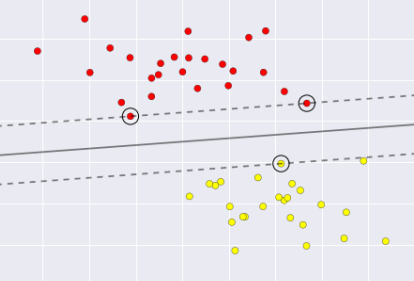

In [43]:
# model.support_vectors_  #the location of support vectors

### <font color=green>Beyond the SVM Kernels</font>
### We projected our data into higher-dimensional space defined by polynomials and Gaussian basis (we didn't cover this topic) functions, and thereby were able to fit for nonlinear relationships with a linear classifier In SVM models, we can use a version of the same idea. For example suppose this data :
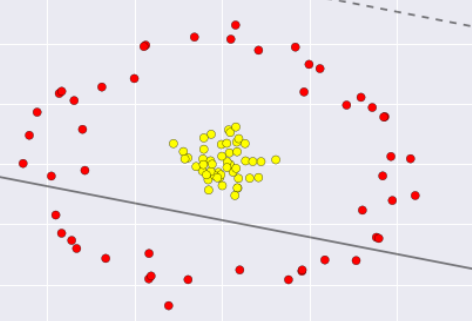

### It is clear that no linear discrimination will ever be able to separate this data, but we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump.
### The <font color=green>radial basis function (RBF)</font> is a mathematical function that takes a real-valued input and outputs a real-valued output based on the distance between the input value projected in space from an imaginary fixed point
### We can see that with this additional dimension, the data becomes trivially linearly separable. we would like to find the best basis functions to use, otherwise, we would not have seen such clean, linearly separable results.

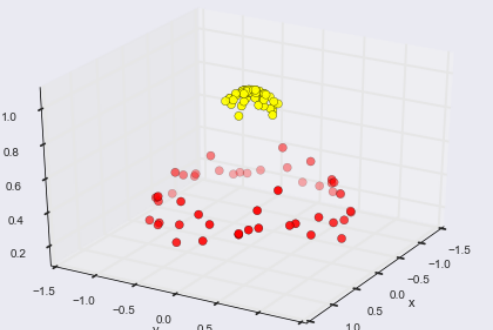

In [44]:
# model = SVC(kernel='rbf')
# model.fit(X, y)

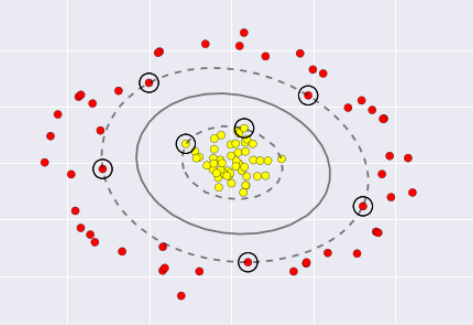

### <font color=green>Tuning the SVM: Softening margins</font>
### Our discussion so far has centered on very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of <font color=green>overlap</font> ? suppose this example below :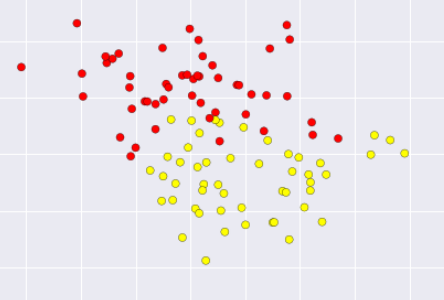


### To handle this case, we have to <font color=green>softens the margin</font>; that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points can not lie in it. For smaller C, the margin is softer, and can grow to encompass some  points.

In [45]:
# model = SVC(C=10)
# default is 1.0 but we can have from .0001 to 1E10

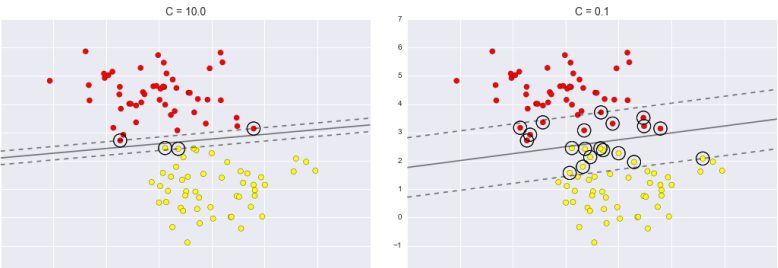

## <font color=red>In-Depth: Decision Trees and Random Forests</font>
### Decision Trees are a non-parametric <font color=green>supervised</font> learning method used for <font color=green>classification</font> and <font color=green>regression</font> . Decision trees are extremely intuitive ways to <font color=green>classify</font>  objects: you simply ask a series of questions to reach the classification.
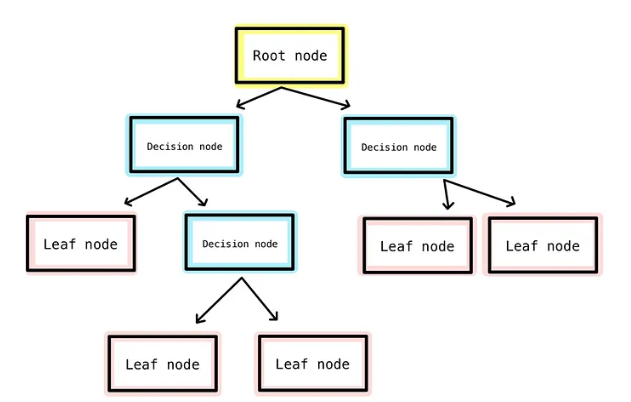
###  It is basically a set of Yes/No or if/else questions. 
### The <font color=green>binary splitting</font> makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.
### In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data; that is, <font color=green>each node in the tree splits the data into two groups using a cutoff value within one of the features</font>.

In [46]:
from sklearn.model_selection import train_test_split

df = sns.load_dataset('iris')

X = df.drop(['species'], axis = 1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
''' params : 
# max_depthint, default=None >>> The maximum depth of the tree. 
# random_state, default=None >>> Controls the randomness of the estimator.
                                The features are always randomly permuted at each split, 
# splitter{“best”, “random”}, default=”best” >>> The strategy used to choose the split at each node.
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini” >>> The function to measure the quality of a split. '''

model.fit(X_train, y_train)
'''
# model.fit(X, y[, sample_weight, check_input]) >>> Build a decision tree classifier from the training set (X, y).
# model.get_depth() >>> Return the depth of the decision tree.
# model.decision_path(X[, check_input]) >>> Return the decision path in the tree.
# model.cost_complexity_pruning_path(X, y[, ...]) >>> Compute the pruning path during Minimal Cost-Complexity Pruning.
# model.apply(X[, check_input]) >>> Return the index of the leaf that each sample is predicted as.
# model.get_n_leaves() >>> Return the number of leaves of the decision tree.
# model.predict(X[, check_input]) >>> Predict class or regression value for X.
# model.predict_proba(X[, check_input]) >>> Predict class probabilities of the input samples X.
# model.feature_importances_ >>> Return the feature importances.
'''
predicted = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predicted, y_test)
print(accuracy)

0.9666666666666667


### we can see that the importance of ‘petal width’ is highest amongst the feature inputs. This means that ‘petal width’ has the largest effect on our decision tree classifier model that was used for classification.

In [49]:
print(df.columns[0:4],"\n",model.feature_importances_)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object') 
 [0.         0.         0.07045241 0.92954759]


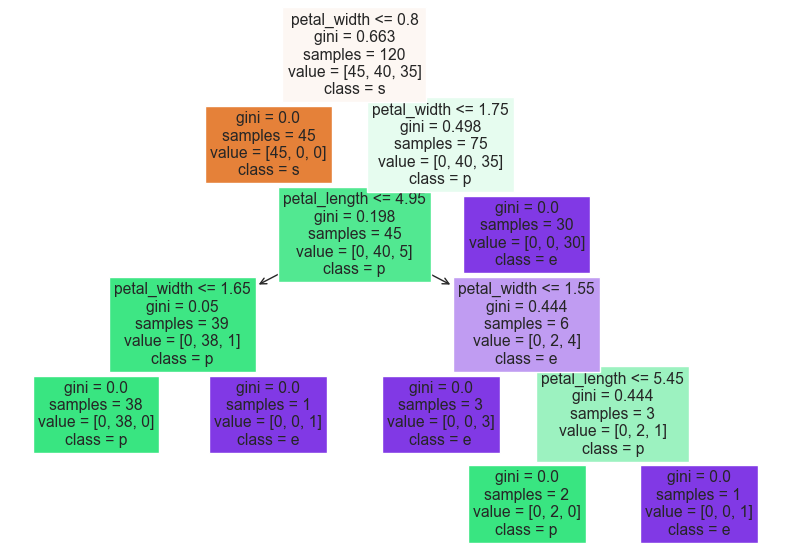

In [50]:
from sklearn import tree

fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = list(X.columns), class_names = list(y.name), filled = True)
plt.show()

### <font color=green>Overfitting in Decision Trees</font>
### In decision trees, In order to fit the data, the model keeps generating new nodes and ultimately the tree becomes too complex to interpret. The decision tree predicts well for the training data but can be inaccurate for new data. If a decision tree model is allowed to train to its full potential, it can overfit the training data.
### <font color=green>Pruning</font> is a technique that removes parts of the decision tree and prevents it from growing to its full depth. Pruning removes those parts of the decision tree that do not have the power to classify instances. Pruning has two types : <font color=green>Pre-Pruning</font> and <font color=green>Post-Pruning</font>.
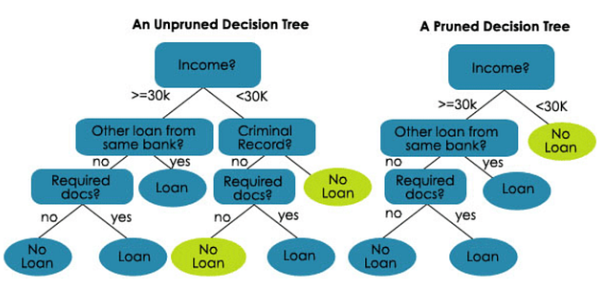

### <font color=green>Pre-Pruning</font> : Also known as <font color=green>Early Stopping</font> or <font color=green>Forward Pruning</font>, stops the growth of the decision tree, preventing it from reaching its full depth. It stops the non-significant branches from generating in a decision tree. Pre-Pruning involves the <font color=green>tuning of the hyperparameters prior to training the model</font>. During each stage of the splitting of the tree, the cross-validation error will be monitored. If the value of the error does not continue to decrease, the tree’s growth is stopped.
### <font color=green>Post-Pruning</font> or <font color=green>backward pruning</font> is a technique that eliminates branches from a completely grown decision tree model to reduce its complexity and variance. This technique allows the decision tree to grow to its full depth, then removes branches to prevent the model from overfitting. In Post-Pruning, non-significant branches of the model are removed using the <font color=green>Cost Complexity Pruning (CCP) </font>technique.

### <font color=green>Random Forests classifier</font>
### that multiple overfitting estimators can be combined to reduce the effect of this overfitting, this underlies an ensemble method called <font color=green>bagging</font>. Bagging makes use of an ensemble (groups) of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An <font color=green>ensemble of randomized decision trees</font> is known as a <font color=green>random foret</font> .

In [51]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier
 
# tree = DecisionTreeClassifier()
# model = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,random_state=1)
'''params:
# n_estimators >>> number of estimators we want
# max_samples >>> fitting each estimator with a random subset. here is 80% of the training points
# random_state >>> random seed
''' 
# model.fit(X, y)
print("yey")

yey


### Or simply use RandomForestClassifier instead!

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=13)
'''params:
#  n_estimatorsint, default=100 >>>The number of trees in the forest.
#  criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
   The function to measure the quality of a split. 
#  max_depthint, default=None >>> The maximum depth of the tree.
#  random_state, default=None >>> random seed
'''
model.fit(X_train, y_train)
'''
# model.fit(X, y[, sample_weight]) >>> Build a forest of trees from the training set (X, y).
# model.apply(X) >>> Apply trees in the forest to X, return leaf indices.
# model.decision_path(X) >>> Return the decision path in the forest.
# model.predict(X) >>> Predict class for X.
# model.score(X, y[, sample_weight]) >>> Return the mean accuracy on the given test data and labels.
# model.predict_proba(X) >>> Predict class probabilities for X.
# model.feature_importances_ >>> The impurity-based feature importances.
# model.estimator_ >>> The estimator used to create the collection of fitted sub-estimators.
# model.estimators_ >>> The collection of fitted sub-estimators.
'''

predicted = model.predict(X_test)

accuracy = accuracy_score(predicted, y_test)
print(accuracy)

0.9666666666666667


### <font color=green>Random Forests Regression</font>
### Random forests can also be made to work in the case of regression. 

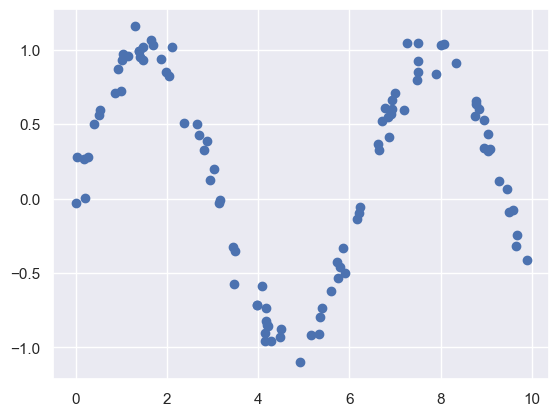

In [53]:
fig = plt.figure(); ax = plt.axes()

rnd = np.random.RandomState(1); X = 10 * rnd.rand(100); y = np.sin(X) + 0.1 * rnd.randn(100)
ax.scatter(X, y)

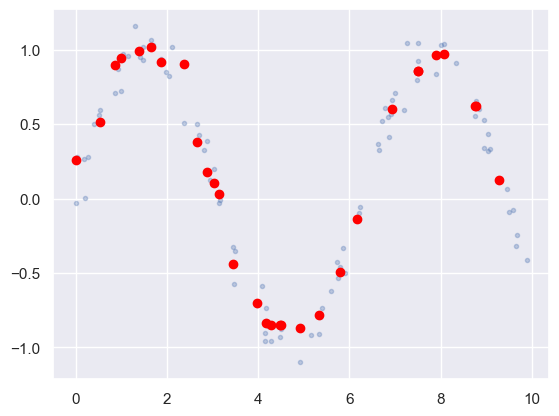

In [54]:
from sklearn.ensemble import RandomForestRegressor
fig = plt.figure(); ax = plt.axes()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.7)

model = RandomForestRegressor(n_estimators=200)
'''params:
#  n_estimators, default=100 >>>The number of trees in the forest.
#  criterion{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}, default=”squared_error”
   The function to measure the quality of a split. 
#  max_depthint, default=None >>> The maximum depth of the tree.
#  random_state, default=None >>> random seed
'''
model.fit(X_train[:, np.newaxis], y_train)
'''
# model.fit(X, y[, sample_weight]) >>> Build a forest of trees from the training set (X, y).
# model.apply(X) >>> Apply trees in the forest to X, return leaf indices.
# model.decision_path(X) >>> Return the decision path in the forest.
# model.predict(X) >>> Predict regression target for X.
# model.score(X, y[, sample_weight]) >>> Return the coefficient of determination of the prediction.
# model.feature_importances_ >>> The impurity-based feature importances.
'''

ax.scatter(X, y,alpha=.3,marker='.')
prediction = model.predict(X_test[:, np.newaxis])
ax.scatter(X_test, prediction, color="red",marker='o')

### Until now, we have been looking in depth at supervised learning estimators, those estimators that predict labels based on labeled training data. Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.
## <font color=red>In Depth: Principal Component Analysis</font>
### <font color=green>Dimensionality reduction</font> : In general, all the features are not equally important and there are certain features that account for a large percentage of variance in the dataset. Dimensionality reduction algorithms aim to reduce the dimension of the feature space to a fraction of the original number of dimensions.
### <font color=green>Principal component analysis (PCA)</font> is a fast and flexible <font color=green>unsupervised</font> method for <font color=green>dimensionality reduction</font> in data.  Also it can be useful as a tool for visualization, noise filtering, feature extraction and engineering, and much more. 

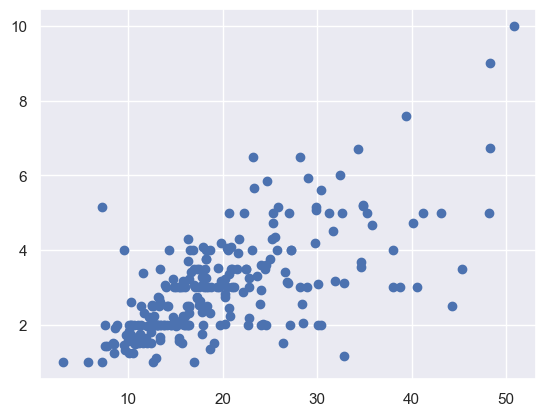

In [55]:
df = sns.load_dataset("tips")
plt.scatter(df['total_bill'], df['tip'])

### By eye, it is clear that there is a nearly linear relationship between the x and y variables. But here rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In [56]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
'''params:
#  n_components: int or ‘mle’, default=None >>> Number of components to keep
   If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension.
#  svd_solver {‘auto’, ‘full’, ‘arpack’, ‘randomized’}, default=’auto’ >>> 
'''

#we use this format for simple understanding just to make it all inside one dataframe
df = pd.DataFrame({"x" : df['total_bill'] , "y" : df['tip']}) 
print(df.shape)

'''
# model.fit(X[, y]) >>> Fit the model with X.
# model.transform(X) >>> Apply dimensionality reduction to X
# model.fit_transform(X[, y]) >>> Fit the model with X and apply the dimensionality reduction on X.
# model.inverse_transform(X) >>> Transform data back to its original space.
# model.get_covariance() >>> Compute data covariance with the generative model.
# model.get_feature_names_out([input_features]) >>> Get output feature names for transformation.
# model.get_precision() >>> Compute data precision matrix with the generative model.
# model.components_ >>> Principal axes in feature space, representing the directions of maximum variance in the data. 
# model.explained_variance_ >>> The amount of variance explained by each of the selected components. 
# model.explained_variance_ratio_ >>> Percentage of variance explained by each of the selected components.
# model.mean_ >>> Per-feature empirical mean, estimated from the training set.
'''
model.fit(df)

(244, 2)


PCA(n_components=2)

### In principal component analysis, one quantifies this relationship by finding a list of the principal axes in the data, and using those axes to describe the dataset. These vectors represent the principal axes of the data.

In [57]:
print(model.components_)
print(model.explained_variance_)
print(model.explained_variance_ratio_)

[[ 0.99438653  0.10580847]
 [-0.10580847  0.99438653]]
[80.13860726  1.02878599]
[0.98732513 0.01267487]


### <font color=blue> read appendix .a for more</font>

### <font color=green> PCA as dimensionality reduction</font>
### Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [58]:
model = PCA(n_components=1)

df_reductioned = model.fit_transform(df)

print("original shape: ", df.shape)
print("transformed shape:", df_reductioned.shape)

original shape:  (244, 2)
transformed shape: (244, 1)


### The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this data and plot it along with the original data :

(244, 2)


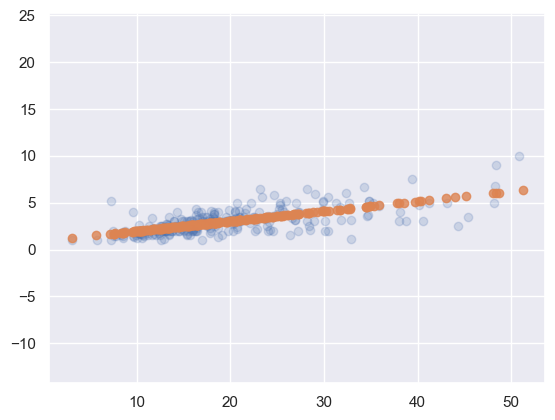

In [59]:
df_reductioned_inversed = model.inverse_transform(df_reductioned)
print(df_reductioned_inversed.shape)

plt.scatter(df['x'], df['y'], alpha=0.2)
plt.scatter(df_reductioned_inversed[:, 0], df_reductioned_inversed[:, 1], alpha=0.8)
plt.axis('equal');

### The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: <font color=green>the information along the least important principal axis or axes is removed, leaving only the component of the data with the highest variance</font>. This reduced-dimension dataset is in some senses “good enough” to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points is mostly preserved.

### <font color=green>PCA for visualization</font>
### The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when we look at high-dimensional data. For example the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions such as 2. 

In [60]:
from sklearn.datasets import load_digits

df = load_digits()
print(df.data.shape)

model = PCA(2)
df_reductioned = model.fit_transform(df.data)
print(df_reductioned.shape)

(1797, 64)
(1797, 2)


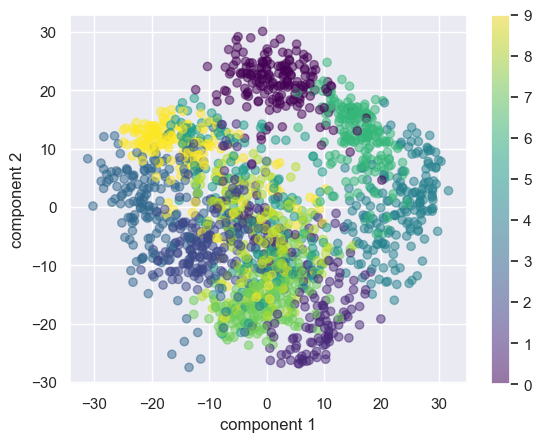

In [61]:
import matplotlib

plt.scatter(df_reductioned[:, 0], df_reductioned[:, 1], c=df.target, alpha=0.5, cmap = matplotlib.colormaps['viridis'])
plt.xlabel('component 1');plt.ylabel('component 2');plt.colorbar();  

### the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64- dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner. 
### <font color=green> So we can reduce dimmension of our data in unsupervised way and then, work on our data with supervised manner :)</font>

### <font color=green>What do components mean?</font>
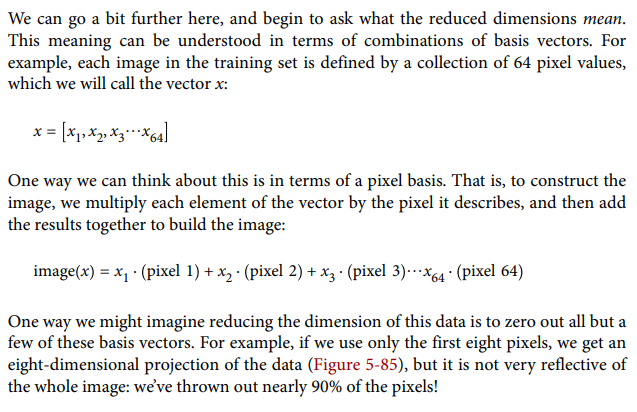

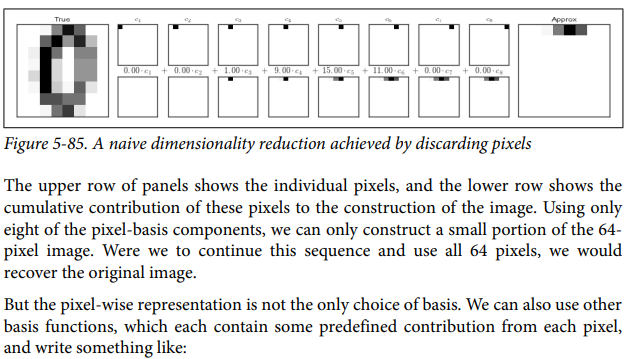

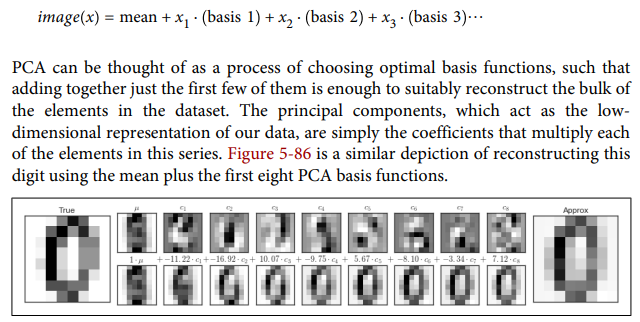

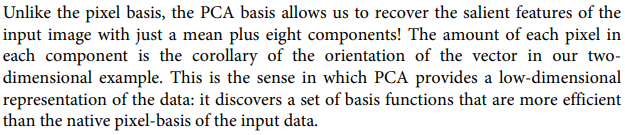

### <font color=green> Choosing the number of components</font>
### A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. We can determine this by looking at the <font color=green>cumulative explained variance ratio</font> as a function of the number of components.

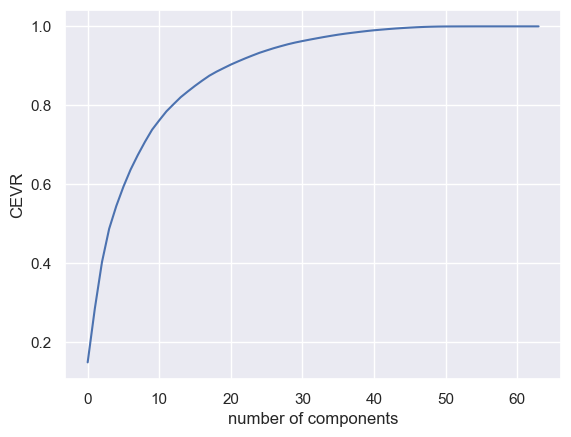

In [62]:
model = PCA().fit(df.data)

plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components'); plt.ylabel('CEVR');

### This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. Here we see that our two-dimensional projection loses a lot of information  and that we’d need about 20 components to retain 90% of the variance.

### <font color=green>PCA as Noise Filtering</font>
### PCA can also be used as a filtering approach for noisy data. Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

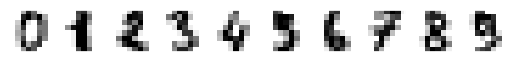

In [63]:
fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':[], 'yticks':[]},)

original_digit_data = df.data[0:10]
for i, ax in enumerate(axes.flat):
    ax.imshow(original_digit_data[i].reshape(8,8),cmap='binary')

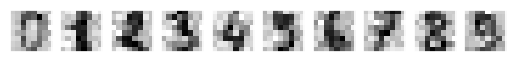

In [64]:
fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':[], 'yticks':[]},)

# add some noise to them  
noisy_digit_data = np.random.normal(original_digit_data, 2)
for i, ax in enumerate(axes.flat):
    ax.imshow(noisy_digit_data[i].reshape(8,8),cmap='binary')

### Let’s train a PCA on the noisy data, requesting that the projection preserve 60% of the variance:

In [65]:
model = PCA(0.60).fit(noisy_digit_data)
print(model.n_components_)

4


### Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits.

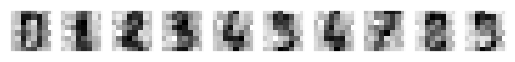

In [66]:
components = model.transform(noisy_digit_data)
filtered = model.inverse_transform(components)

fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':[], 'yticks':[]},)
for i, ax in enumerate(axes.flat):
    ax.imshow(filtered[i].reshape(8,8),cmap='binary')

### <font color=green>PCA’s main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed. Including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. Randomi zedPCA, which we saw earlier, uses a nondeterministic method to quickly approximate the first few principal components in very high-dimensional data, and SparsePCA introduces a regularization term  that serves to enforce sparsity of the components.</font>

## <font color=red>In-Depth: Manifold Learning</font>

### While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data, To address this deficiency, we can turn to a class of methods known as <font color=green>manifold learning</font>, a class of <font color=green>unsupervised</font> estimators that seeks to describe datasets as lowdimensional manifolds embedded in high-dimensional spaces.
### Imagine a paper, it is a 2-d object that lives in our 3-d world. Rotating, reorienting, or stretching this paper in 3-d space doesn’t change the flat geometry of the paper,  If you bend, curl, or crumple the paper, it is still a 2-d manifold, but the embedding into the 3-d space is no longer linear. Manifold learning algorithms would seek to learn about the fundamental 2-d nature of the paper, even as it is contorted to fill the 3-d space.
### there is different kind of manifold methods, we will discuss about these: <font color=green>multidimensional scaling (MDS)</font>, <font color=green>locally linear embedding (LLE)</font>, and <font color=green>isometric mapping (Isomap)</font>.
### So suppose this 2-d data that we can use to define a manifold:

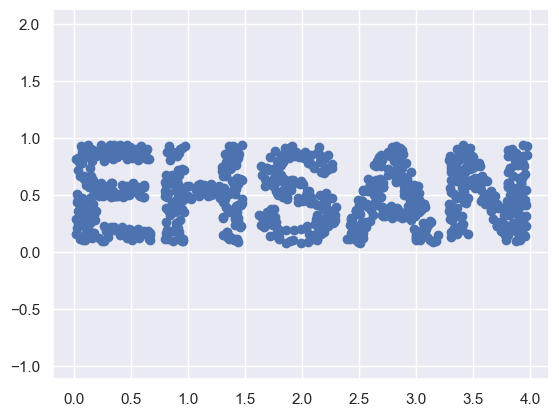

In [67]:
def make_data(N=1000, text='HELLO', rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, text, va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

df = make_data(N=1000, text="EHSAN")
plt.scatter(df[:, 0], df[:, 1])
plt.axis('equal');

### <font color=green>Multidimensional Scaling (MDS)</font>
### Looking at data like this, we can see that the particular choice of x and y values of the dataset are not the most fundamental description of the data, we can <font color=green>scale</font> , <font color=green>shrink</font> , or <font color=green>rotate</font> the data, and the “HELLO” will still be apparent. This tells us that the x and y values are not necessarily fundamental to the relationships in the data.
### What is fundamental, in this case, is the <font color=green>distance between each point and the other points</font> in the dataset. A common way to represent this is to use a <font color=green>distance matrix</font> :  for N points, we construct an N×N array such that entry i,j contains the distance between point i and point j.

(1000, 1000)


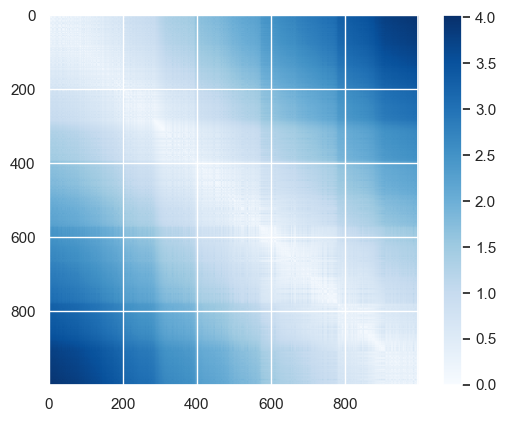

In [68]:
from sklearn.metrics import pairwise_distances

distant_matrix = pairwise_distances(df)
print(distant_matrix.shape)

plt.imshow(distant_matrix, cmap='Blues')
plt.colorbar()

### Notice that If we similarly construct a distance matrix for our rotated and translated data, we see that it is the same. Further, while computing this distance matrix from the (x, y) coordinates is straight forward, transforming the distances back into x and y coordinates is rather difficult.
### This is exactly what the multidimensional scaling algorithm aims to do: <font color=green>given a distance matrix between points, it recovers a D-dimensional coordinate representation of the data </font>.
### The <font color=green>MDS algorithm</font> recovers <font color=green>one of the possible</font> two-dimensional coordinate representations of our data, using only the N×N distance matrix describing the relationship between the data points.

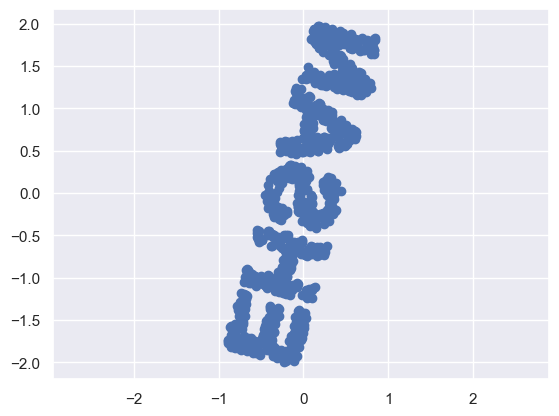

In [69]:
from sklearn.manifold import MDS

model = MDS(n_components=2, dissimilarity='precomputed', random_state=1, normalized_stress='auto')
'''params:
#  n_components, default=2 >>> Number of dimensions in which to immerse the dissimilarities.
#  random_state, default=None >>> Determines the random number generator used to initialize the centers.
#  dissimilarity{‘euclidean’, ‘precomputed’}, default=’euclidean’
   euclidean: Pairwise Euclidean distances between points in the dataset.
   precomputed: Pre-computed dissimilarities are passed directly to fit and fit_transform.
#  normalized_stress : True,False or “auto”, default=False >>> 
   Whether use and return normed stress value (Stress-1) instead of raw stress calculated by default.
'''

out = model.fit_transform(distant_matrix)
'''
# model.fit(X[, y, init]) >>> Compute the position of the points in the embedding space.
# model.fit_transform(X[, y, init]) >>> Fit the data from X, and returns the embedded coordinates.
# model.stress_ >>> The final value of the stress (sum of squared distance of the disparities and
                     the distances for all constrained points).
# model.dissimilarity_matrix >>> Pairwise dissimilarities between the points.
'''

plt.scatter(out[:, 0], out[:, 1])
plt.axis('equal');

### <font color=green> MDS as Manifold Learning</font>
### The usefulness of this becomes more apparent when we consider the fact that distance matrices can be computed from data in any dimension. For example We can now ask the MDS estimator to input this 3-d data, compute the distance matrix, and then determine the optimal 2-d embedding for this distance matrix. The result recovers a representation of the original data.

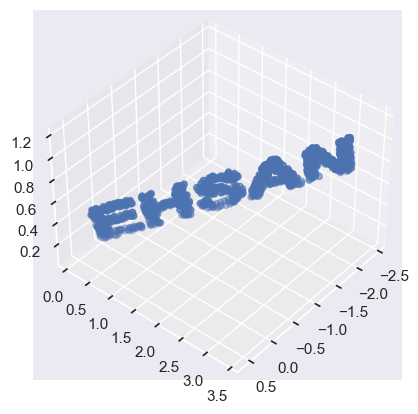

In [70]:
def project_data_to_higher_dimension(X, dimension=3, rseed=42):
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

df_3d = project_data_to_higher_dimension(df, 3)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(df_3d[:, 0], df_3d[:, 1], df_3d[:, 2])
ax.view_init(azim=40, elev=40)

(-0.9843288630423676,
 0.9333740793057957,
 -2.1938764468959824,
 2.171079980942652)

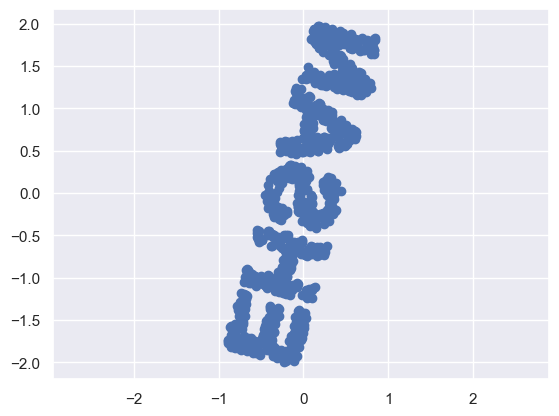

In [71]:
model = MDS(n_components=2, random_state=1, normalized_stress='auto')
out = model.fit_transform(df_3d)

plt.scatter(out[:, 0], out[:, 1])
plt.axis('equal')

### This is essentially the goal of a manifold learning estimator: <font color=green>given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data</font>.

### <font color=green>Nonlinear Embeddings: Where MDS Fails</font>
### Our discussion so far has considered linear embeddings, which essentially consist of rotations, translations, and scalings of data into higher-dimensional spaces. Where MDS breaks down is when the embedding is nonlinear. Suppose this data : 

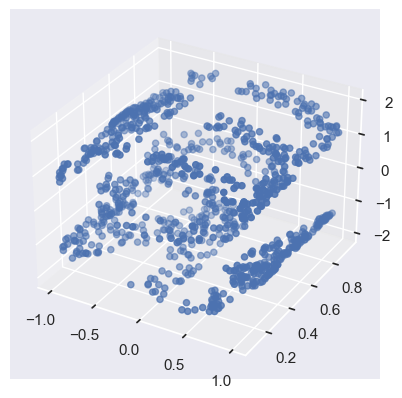

In [72]:
def make_data_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

out = make_data_s_curve(df)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(out[:, 0], out[:, 1], out[:, 2]);

(-1.7301499394215638,
 1.7071843247460272,
 -2.1006090838408777,
 2.1894838683781637)

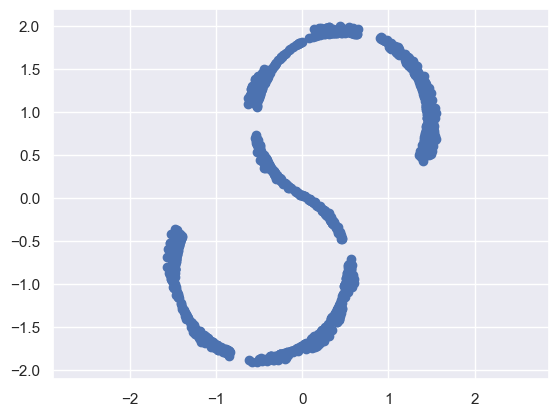

In [73]:
model = MDS(n_components=2, random_state=2, normalized_stress='auto')

outS = model.fit_transform(out)
plt.scatter(outS[:, 0], outS[:, 1])
plt.axis('equal')

### The fundamental relationships between the data points are still there, but this time the data has been transformed in a nonlinear way: it has been wrapped up into the shape of an “S.” So How can we move forward here? we can use Nonlinear Manifolds.
### <font color=green>Nonlinear Manifolds: Locally Linear Embedding</font>
### We can see that the source of the problem is that MDS tries to preserve distances between faraway points when constructing the embedding. But what if we instead modified the algorithm such that it only preserves distances between <font color=green>nearby</font> points? 


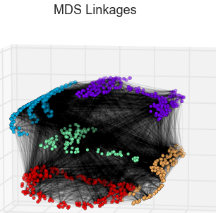


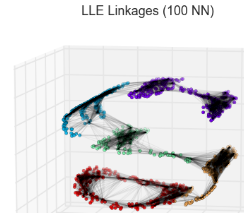

### On the left is a representation of the model used by MDS, it tries to preserve the distances between each pair of points in the dataset. On the right is a representation of the model used by a manifold learning algorithm called <font color=green>locally linear embedding (LLE)</font> , rather than preserving all distances, it instead tries to preserve only the <font color=green>distances between neighboring points</font>: in this case, the nearest 100 neighbors of each point.
### LLE comes in a number of flavors, here we will use the modified LLE algorithm to recover the embedded 2-d manifold. In general, modified LLE does better than other flavors of the algorithm at recovering well-defined manifolds with very little distortion.

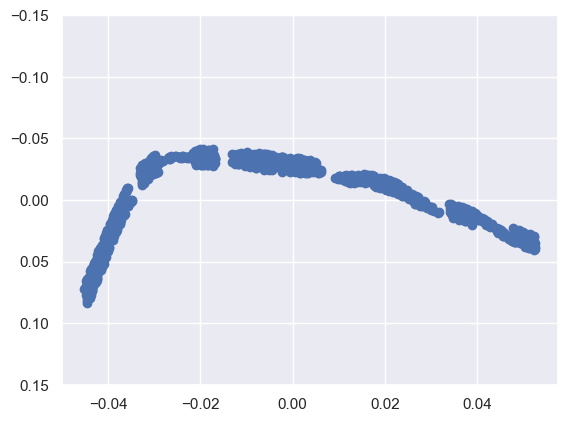

In [74]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
'''params:
#  n_neighbors, default=5 >>> Number of neighbors to consider for each point.
#  n_components, default=2 >>> Number of coordinates for the manifold.
#  eigen_solver{‘auto’, ‘arpack’, ‘dense’}, default=’auto’ >>> The solver used to compute the eigenvectors.
   'auto' : algorithm will attempt to choose the best method for input data.
   'arpack' : use arnoldi iteration in shift-invert mode.
   'dense' : use standard dense matrix operations for the eigenvalue decomposition.
#  method{‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’ >>>    
#  neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
#  random_state, default=None
'''
out_lle = model.fit_transform(out)
'''
# model.fit(X[, y]) >>> Compute the embedding vectors for data X
# model.transform(X) >>> Transform new points into embedding space.
# model.fit_transform(X[, y]) >>> Compute the embedding vectors for data X and transform X.
# model.embedding_ >>> Stores the embedding vectors
'''

fig, ax = plt.subplots()
ax.scatter(out_lle[:, 0], out_lle[:, 1])
ax.set_ylim(0.15, -0.15);

### <font color=red> in practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.</font>

## <font color=red>In Depth: k-Means Clustering</font>
### <font color=green>Clustering algorithms</font> seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points. The<font color=green> k-means algorithm</font> searches for a predetermined <font color=green>number of clusters</font> within an unlabeled multidimensional dataset.
### These two assumptions are the basis of the k-means model : </br>a.The <font color=green>cluster center</font> is the arithmetic mean of all the points belonging to the cluster.</br>b.Each point is closer to its own cluster center than to other cluster centers.

<Axes: xlabel='petal_length', ylabel='petal_width'>

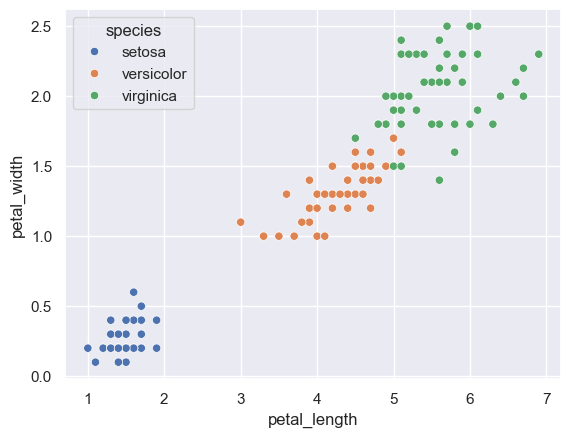

In [75]:
df = sns.load_dataset('iris')
df = df.dropna()

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [76]:
from sklearn.cluster import KMeans

X = df[['petal_length','petal_width']]

model = KMeans(n_clusters=3, n_init=10)
'''params:
#  n_clusters, default=8
#  init {‘k-means++’, ‘random’}, default=’k-means++’
#  n_init ‘auto’ or int, default=10 >>> Number of times the k-means algorithm is run with different
                                        centroid seeds. The final results is the best output 
#  algorithm {“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”
#  random_state, default:None
'''

'''
# model.fit(X[, y, sample_weight]) >>> Compute k-means clustering.
# model.transform(X) >>> Transform X to a cluster-distance space
# model.fit_transform(X[, y, sample_weight]) >>> Compute clustering and transform X to cluster-distance space.
# model.predict(X[, sample_weight]) >>> Predict the closest cluster each sample in X belongs to.
# model.cluster_centers_ >>> Coordinates of cluster centers.
# model.labels_ >>> Labels of each point
# model.inertia_ >>> Sum of squared distances of samples to their closest cluster center
'''
model.fit(X)

KMeans(n_clusters=3, n_init=10)

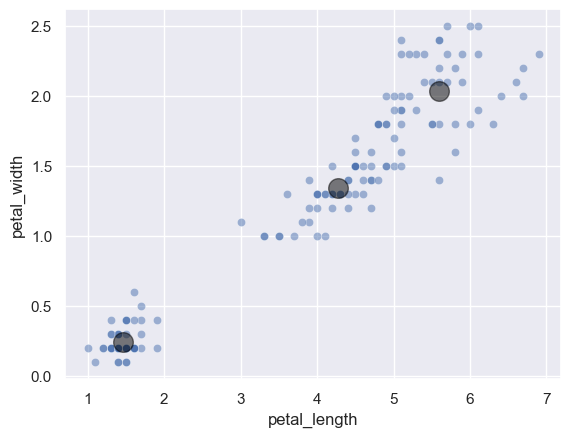

In [77]:
centers = model.cluster_centers_

sns.scatterplot(data=df, x='petal_length', y='petal_width', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

(150,)


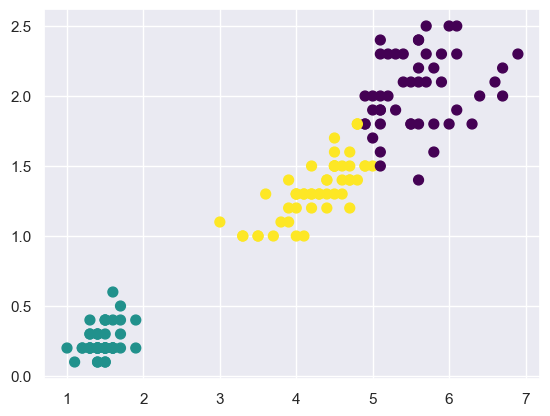

In [78]:
prediction_clusters = model.predict(X)
print(prediction_clusters.shape)

plt.scatter(X['petal_length'], X['petal_width'], c=prediction_clusters, s=50, cmap='viridis')

### <font color=green>k-Means Algorithm: Expectation–Maximization</font>
### You might wonder how this algorithm finds these clusters so quickly! the typical approach to k-means involves an intuitive iterative approach known as <font color=green>expectation–maximization</font>. Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science and k-means is a particularly simple and easy-tounderstand application of the algorithm. 
### the expectation–maximization approach consists of the following procedure:</br></br>1. Guess some cluster centers</br></br>2. Repeat until converged:</br> 2.a. E-Step: assign points to the nearest cluster center</br>2.b. M-Step: set the cluster centers to the mean
### <font color=green>E-step</font> or <font color=green>Expectation step</font> is so named because it involves updating ourexpectation of which cluster each point belongs to. The <font color=green>M-step</font> or <font color=green>Maximization step</font> is so named because it involves maximizing some fitness function that defines the location of the cluster centers, and maximization is accomplished by taking a simple mean of the data in each cluster. So each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

### <font color=green>Caveats of expectation–maximization</font>
### There are a few issues to be aware of when using the expectation–maximization algorithm :
### 1. The globally optimal result may not be achieved, there is no assurance that it will lead to the global best solution. For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results.
### 2. The number of clusters must be selected beforehand, it cannot learn the number of clusters from the data. So you might use a more complicated clustering algorithm which has a better quantitative measure of the fitness per number of clusters (e.g <font color=green>Gaussian mixture models</font>) or which can choose a suitable number of clusters (e.g <font color=green>DBSCAN</font>, <font color=green>mean-shift</font>, or <font color=green>affinity propagation</font>)
### 3. k-means is limited to linear cluster boundaries. The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries. For example :

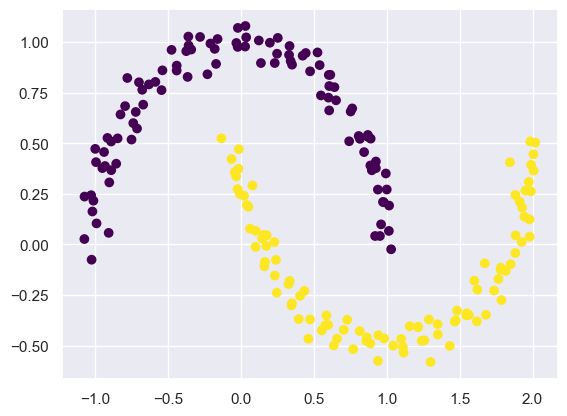

In [79]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

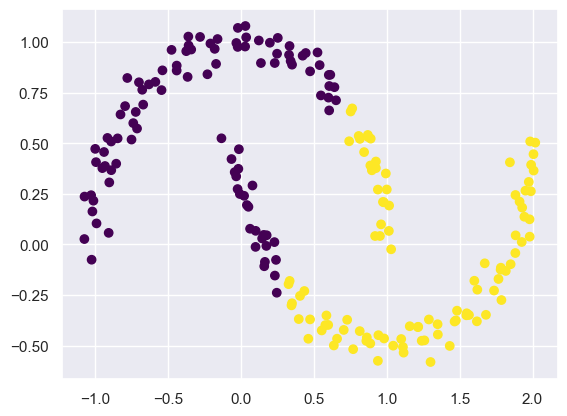

In [80]:
model = KMeans(n_clusters=2, n_init=10)
model.fit(X)
prediction = model.predict(X)

plt.scatter(X[:,0], X[:,1], c=prediction, cmap='viridis')

### we can use a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover nonlinear boundaries. One version of this kernelized k-means is implemented in Scikit-Learn within the <font color=green>SpectralClustering estimator</font>. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

C:\Users\Ehsan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


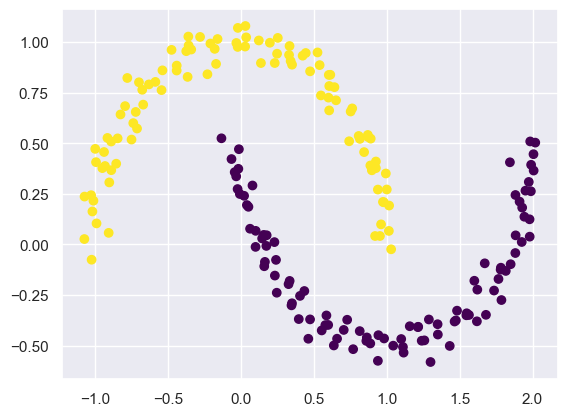

In [81]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
'''params:
#  n_clustersint, default=8
#  eigen_solver{‘arpack’, ‘lobpcg’, ‘amg’}, default=None >>>
#  affinity, default=’rbf’
   ‘nearest_neighbors’: construct the affinity matrix by computing a graph of nearest neighbors.
   ‘rbf’: construct the affinity matrix using a radial basis function (RBF) kernel.
   ‘precomputed’: interpret X as a precomputed affinity matrix, where larger values indicate
                  greater similarity between instances.
    ‘precomputed_nearest_neighbors’: interpret X as a sparse graph of precomputed distances,
                                     and construct a binary affinity matrix from the n_neighbors
                                     nearest neighbors of each instance.
#  assign_labels{‘kmeans’, ‘discretize’, ‘cluster_qr’}, default=’kmeans’ >>>
                                     The strategy for assigning labels in the embedding space.
#  degree, default=3  >>> Degree of the polynomial kernel. Ignored by other kernels.
'''

prediction = model.fit_predict(X)
'''
# model.fit(X[, y]) >>> Perform spectral clustering from features, or affinity matrix.
# model.fit_predict(X) >>> Perform spectral clustering on X and return cluster labels.
'''

plt.scatter(X[:,0], X[:,1], c=prediction, cmap='viridis')

### We see that with this kernel transform approach, <font color=green>the kernelized k-means is able to find the more complicated nonlinear boundaries between clusters.</font>
### 4. k-means can be slow for large numbers of samples. Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. you might just use a subset of the data to update the cluster centers at each step. This is the idea behind <font color=green>batch-based k means algorithms</font>. For example here we use this one for color compression :

(427, 640, 3)


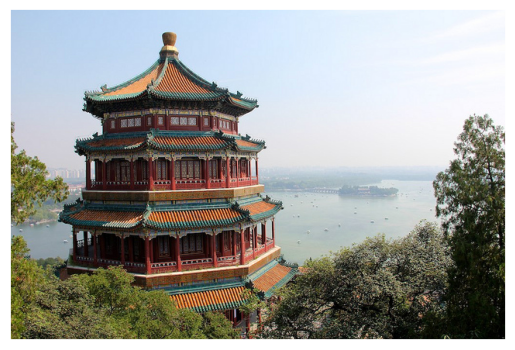

In [82]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg"); print(china.shape)

ax = plt.axes(xticks=[], yticks=[]); ax.imshow(china)

In [83]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print(data.shape)

(273280, 3)


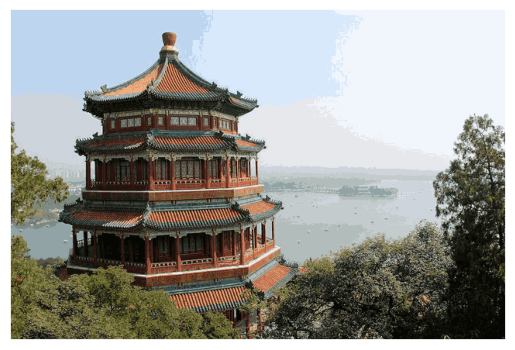

In [84]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(32, n_init='auto')
'''params:
#  n_clusters, default=8
#  init{‘k-means++’, ‘random’}, default=’k-means++’ >>> Method for initialization:
#  batch_size, default=1024 >>> Size of the mini batches. For faster computations, you can set the batch_size greate
                                than 256 * number of cores to enable parallelism on all cores.                                
'''

model.fit(data)
''' same as KMeans '''

new_colors = model.cluster_centers_[model.predict(data)]
china_recolored = new_colors.reshape(china.shape)

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china_recolored)

## <font color=red> In Depth: Gaussian Mixture Models (GMM)</font>
### In particular, the nonprobabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations. Let’s take a look at some of the weaknesses of k-means and think about how we might improve the cluster model. For example suppose this data :</br> 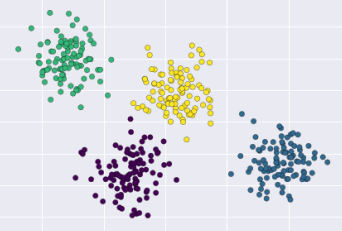

### We might expect that the clustering assignment for some points is more certain than others; for example, there appears to be a very slight <font color=green>overlap</font> between the two middle clusters, such that we might not have complete confidence in the cluster assignment of points between them. Unfortunately, the k-means model has no intrinsic measure of probability or uncertainty of cluster assignments. An important observation for k-means is that these cluster models must be <font color=green>circular</font> : kmeans has no built-in way of accounting for oblong or elliptical clusters. So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled : </br> 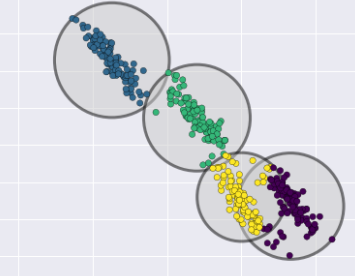

### we recognize that these transformed clusters are noncircular, and thus circular clusters would be a poor fit. Nevertheless, k-means is not flexible enough to account for this, and tries to force-fit the data into four circular clusters. This results in a mixing of cluster assignments where the resulting circles overlap: see especially the bottom right of this plot. 
### These two disadvantages of k-means :  <font color=green>lack of flexibility in cluster shape</font> and <font color=green>lack of probabilistic cluster assignment</font>, mean that for many datasets (especially lowdimensional datasets) it may not perform as well as you might hope.

### <font color=green>Gaussian mixture models</font>, can be viewed as an extension of the ideas behind k-means, and can be a powerful tool for estimation beyond simple clustering. A Gaussian mixture model (GMM) <font color=green>attempts to find a mixture of multidimensional Gaussian probability distributions that best model any input dataset</font>. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means. 

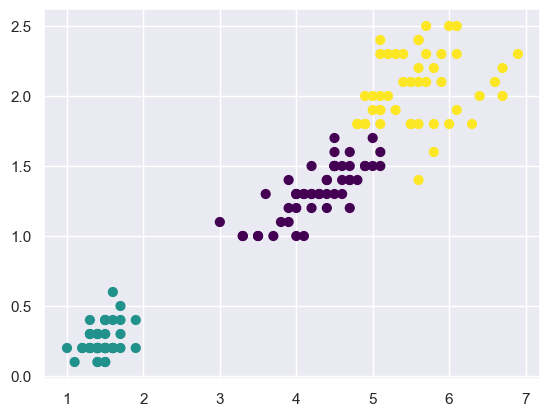

In [85]:
from sklearn.mixture import GaussianMixture

df = sns.load_dataset('iris')
df = df.dropna()

X = df[['petal_length','petal_width']]

model = GaussianMixture(n_components=3)
'''params:
#  n_components, default=1
#  covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
   ‘full’: each component has its own general covariance matrix.
   ‘tied’: all components share the same general covariance matrix.
   ‘diag’: each component has its own diagonal covariance matrix.
   ‘spherical’: each component has its own single variance.
#  init_params{‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’}, default=’kmeans’
   The method used to initialize the weights, the means and the precisions.
#  random_state, default=None
'''
model.fit(X)
'''
# model.fit(X[, y]) >>> Estimate model parameters with the EM algorithm.
# model.predict(X) >>> Predict the labels for the data samples in X using trained model.
# model.fit_predict(X[, y]) >>> Estimate model parameters using X and predict the labels for X.
# model.predict_proba(X) >>> Evaluate the components' density for each sample.
# model.aic(X) >>> Akaike information criterion for the current model on the input X.
# model.bic(X) >>> Bayesian information criterion for the current model on the input X.
'''
prediction = model.predict(X)

plt.scatter(X['petal_length'], X['petal_width'], c=prediction, s=40, cmap='viridis');

### Because GMM contains a <font color=green>probabilistic model</font> under the hood, it is also possible to find probabilistic cluster assignments. It returns a matrix of size [n_samples, n_clusters] that measures the probability that any point belongs to the given cluster:

In [86]:
probs = model.predict_proba(X)
print(probs[:5].round())

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Under the hood, a Gaussian mixture model is very similar to k-means: it uses an <font color=green>expectation–maximization</font> approach that qualitatively does the following: </br></br> 1. Choose starting guesses for the location and shape</br></br>2. Repeat until converged:</br>a. <font color=green>E-step</font> : for each point, find weights encoding the probability of membership in each cluster</br>b. <font color=green>M-step</font> : for each cluster, update its location, normalization, and shape based on all data points, making use of the weights.
### The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model. Just as in the k-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

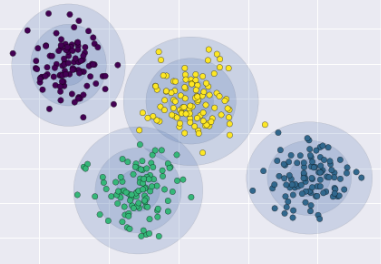

### Similarly, we can use the GMM approach to fit our stretched dataset; allowing for a full covariance, the model will fit even very oblong, stretched-out clusters : </br>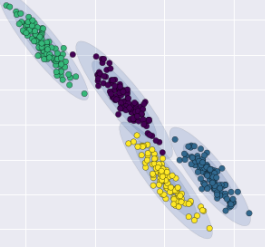

### This makes clear that GMMs address the two main practical issues with k-means encountered before.

### <font color=green>Choosing the covariance type</font>
### The hyperparameter of covariance_type, controls the degrees of freedom in the shape of each cluster.</br>The default is <font color=green>"diag"</font>, which means that the size of the cluster along each dimension can be set independently, with the resulting ellipse constrained to align with the axes.</font>A slightly simpler and faster model is <font color=green>"spherical"</font>, which constrains the shape of the cluster such that all dimensions are equal. The resulting clustering will have similar characteristics to that of k-means, though it is not entirely equivalent.</br> A more complicated and computationally expensive model (especially as the number of dimensions grows) is to use <font color=green>"full"</font>, which allows each cluster to be modeled as an ellipse with arbitrary orientation.
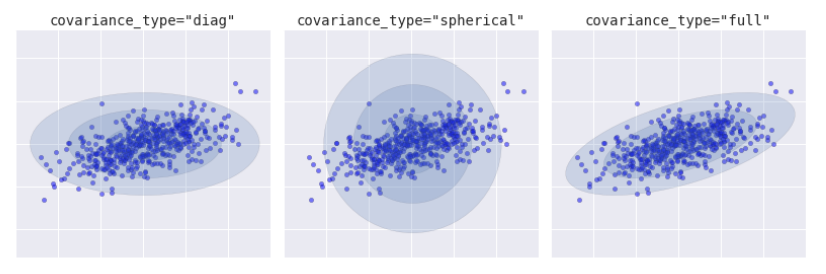

### <font color=green>GMM as Density Estimation</font>
### Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for <font color=green>density estimation</font>. It means the result of a GMM fit to some data is technically not a clustering model, but it's a <font color=green>generative probabilistic model describing the distribution of the data</font>. 
### Consider this data :

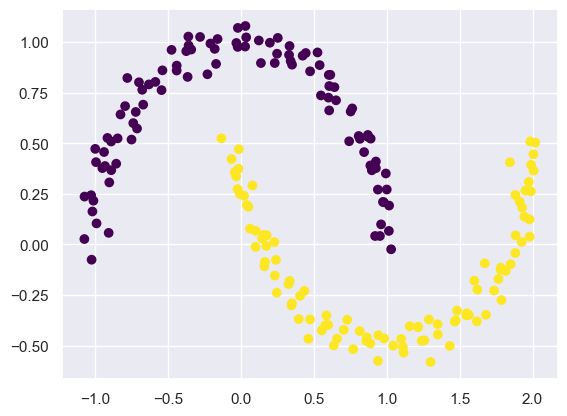

In [87]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

### If we try to fit this to a two-component GMM viewed as a clustering model, the results are not particularly useful:

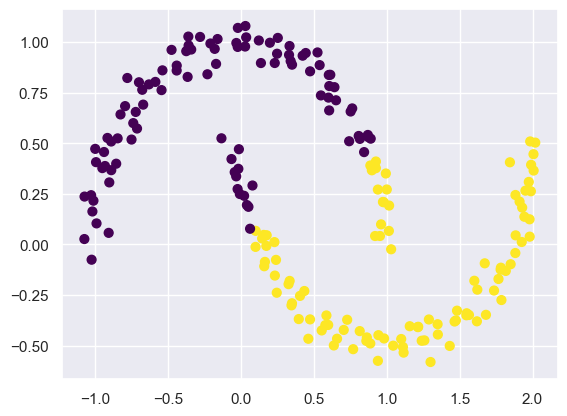

In [88]:
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
model.fit(X)
prediction = model.predict(X)

plt.scatter(X[:,0], X[:,1], c=prediction, s=40, cmap='viridis');

### But if we instead use many more components and ignore the cluster labels, we find a fit that is much closer to the input data:

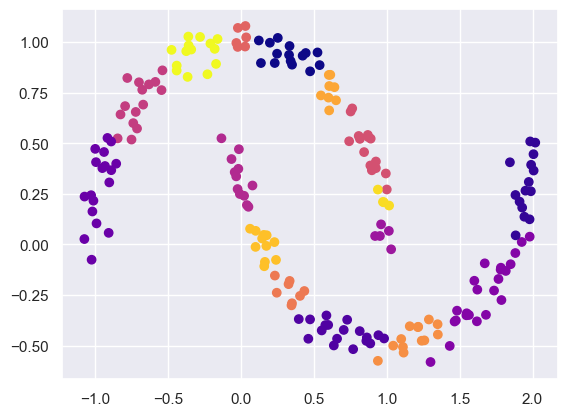

In [89]:
model = GaussianMixture(n_components=16, covariance_type='full', random_state=0)

model.fit(X)
prediction = model.predict(X)

plt.scatter(X[:,0], X[:,1], c=prediction, cmap='plasma')

### or without considering the lables, its like this : 
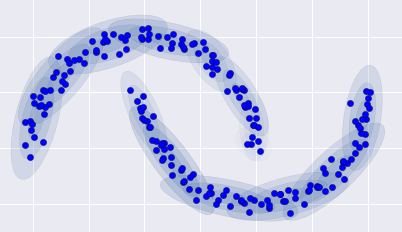
### Here the mixture of 16 Gaussians, did not find separated clusters of data, but find a way to model the overall distribution of the input data. This is a <font color=green>generative model of the distribution</font>, meaning that the GMM gives us the recipe to <font color=green>generate new random data distributed similarly to our input</font>.
### <font color=green> How many components?</font>

### The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).

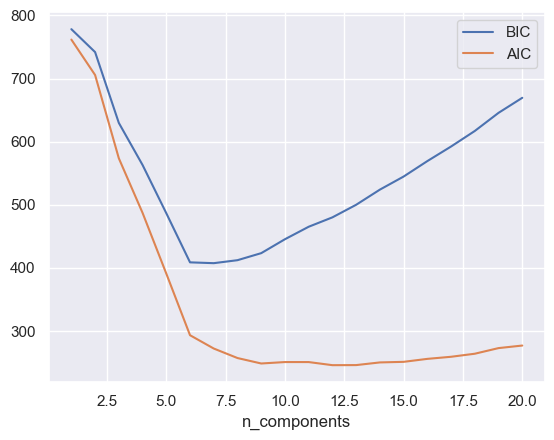

In [90]:
n_components = np.arange(1, 21)

models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best'); plt.xlabel('n_components');

### The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice.
### <font color=red>Notice the important point: this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm. I'd encourage you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.</font>

## <font color=red>In Depth: Kernel Density Estimator</font>
### Kernel density estimation is a <font color=green>non-parametric model</font> also know as <font color=green>KDE</font>, it’s a technique that lets you <font color=green>create a smooth curve given a set of data</font>. KDE basically <font color=green>centers a kernel function at each data point and smooths it to get a destiny estimate</font>.
### The motivation behind the creation of KDM was that Histograms are not smooth, they depend on the width of the bins and the endpoints of the bins, KDMs reduce the problem by providing smoother curves. This can be useful if you want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram.

### <font color=green>Parametric models</font> have a fixed number of adaptable parameters, independent of the amount of data. Ex: Logistic regression, K-means clustering.
### <font color=green>Non-parametric models</font> have a variable number of parameters i.e. parameters change to adapt to the amount of data. In simple terms in order to make predictions the models looks at some(mostly all) data points in order to make a decision. Ex: Kernel Density Estimators, SVMs, Decision Trees.
### <font color=green>Density Estimation</font> is the construction of an estimate, based on observed data, of an unobservable underlying probability density function. So our goal for a new point x is to estimate p(x), where p(x) is the probability of x being a part of the density function.
### <font color=green>Kernel Density Estimation</font> is smoothening the data by convolving each point x with some ‘kernel’. Each point is represented as the center for a kernel density function and the final curve is normalized convolution(sum) of all kernels at that point.

### <font color=green>Kernels parameters</font>
### 1. <font color=green>Kernel function</font>: This is the most important parameter as it decides how your data will be represented. The most commonly used kernels are ‘gaussian’ and ‘exponential’.
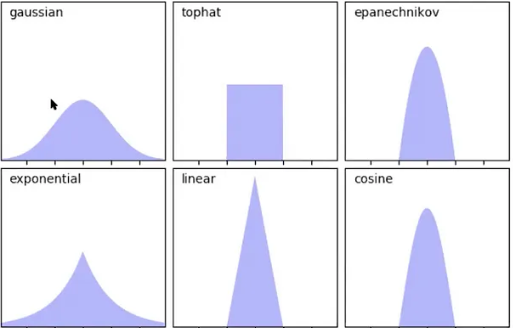

### 2. <font color=green>Kernel function bandwidth (h)</font>: Changing the bandwidth changes the shape of the kernel i.e. it either expands or squeezes the function. A lower bandwidth means only points very close to the current position are given any weight, which leads to the estimate looking squiggly; a higher bandwidth means a shallow kernel where distant points can contribute.
### 3. <font color=green>Number of components (k)</font>: This is not a parameter that directly relates to the kernel function but relates to our model. k is basically the number of bins or buckets in which to divide our data into.

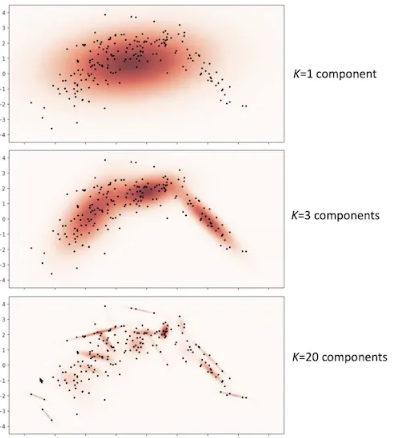

In [91]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(kernel='gaussian', bandwidth=1.0)
'''params:
#  bandwidth: float or {“scott”, “silverman”}, default=1.0
#  algorithm{‘kd_tree’, ‘ball_tree’, ‘auto’}, default=’auto’ >>> The tree algorithm to use.
#  kernel{‘gaussian’, ‘tophat’, ‘epanechnikov’, ‘exponential’, ‘linear’, ‘cosine’}, default=’gaussian’
'''

'''
# model.fit(X[, y, sample_weight]) >>> Fit the Kernel Density model on the data.
# model.sample([n_samples, random_state]) >>> Generate random samples from the model.
# model.
'''

print("yey")

yey
